<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-19 Workaround 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# download updated data
# repository italy https://github.com/pcm-dpc/COVID-19/tree/master/dati-andamento-nazionale
url_csv_file = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url_csv_file)
print('aggiornamento al '+str(np.array(df['data'])[-1])[0:10])
df.tail()

aggiornamento al 2020-11-15


,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
261,2020-11-11T17:00:00,ITA,29444,3081,32525,580833,613358,23248,32961,372113,42953,657205.0,371219.0,1028424,17965836,10891971.0,NaN
262,2020-11-12T17:00:00,ITA,29873,3170,33043,602011,635054,21696,37978,387758,43589,674591.0,391810.0,1066401,18200508,11025449.0,NaN
263,2020-11-13T17:00:00,ITA,30914,3230,34144,629782,663926,28872,40902,399238,44139,697312.0,409991.0,1107303,18455416,11170324.0,NaN
264,2020-11-14T17:00:00,ITA,31398,3306,34704,653731,688435,24509,37255,411434,44683,718482.0,426070.0,1144552,18683111,11305441.0,NaN
265,2020-11-15T17:00:00,ITA,32047,3422,35469,677021,712490,24055,33979,420810,45229,736846.0,441683.0,1178529,18878386,11416172.0,NaN


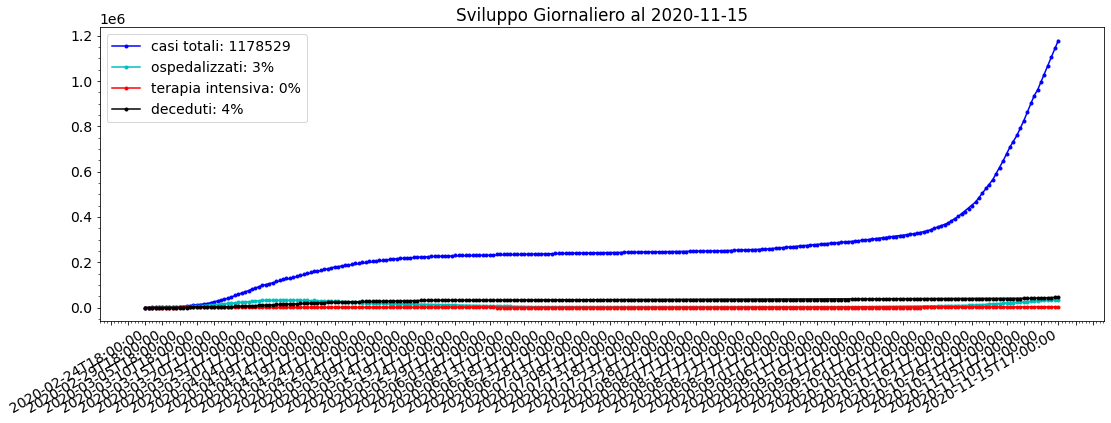

In [3]:
# visualize Daly data of infected and death people
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.style.use('fast')
plt.rc('font', size = 14, family ='Sans-Serif')
fig, ax = plt.subplots(figsize=(18,6))
fig.autofmt_xdate()
ax.plot(df['data'], df['totale_casi'], 'b.-', label='casi totali: '+str(np.array(df['totale_casi'])[-1]))
perc_ospedalizzati = 100*np.array(df['totale_ospedalizzati'])[-1]/np.array(df['totale_casi'])[-1]
ax.plot(df['data'], df['totale_ospedalizzati'], 'c.-', label='ospedalizzati: {0:.0f}%'.format(perc_ospedalizzati))
perc_intensiva = 100*np.array(df['terapia_intensiva'])[-1]/np.array(df['totale_casi'])[-1]
ax.plot(df['data'], df['terapia_intensiva'], 'r.-', label='terapia intensiva: {0:.0f}%'.format(perc_intensiva))
perc_deceduti = 100*np.array(df['deceduti'])[-1]/np.array(df['totale_casi'])[-1]
ax.plot(df['data'], df['deceduti'], 'k.-', label='deceduti: {0:.0f}%'.format(perc_deceduti))
#ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Sviluppo Giornaliero al '+str(np.array(df['data'])[-1])[0:10])
#ax.set_yscale('log')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.legend(loc=2)
plt.minorticks_on()
plt.show()

In [4]:
def Exp(x, p0, p1): # negative exponential
    import numpy as np
    return p0*np.exp(x/p1)

def Infected(t, I0, mu, R0): # negative exponential
    import numpy as np
# https://medium.com/data-for-science/epidemic-modeling-101-or-why-your-covid19-exponential-fits-are-wrong-97aa50c55f8
    return I0*np.exp(mu*(R0-1)*t)

# def Logistic(x, L, k, x0):
#     import numpy as np
#     return L / (1. + np.exp(-k * (x - x0)))

def Logistic(x, a, b, c):
    import numpy as np
# https://it.wikipedia.org/wiki/Equazione_logistica
    return a / (1. + b * np.exp(-c * x))

def Logistic4(x, a, b, c, d):
    import numpy as np
# https://it.wikipedia.org/wiki/Equazione_logistica
    return a / (1. + b * np.exp(-c * x)) + d

def dLogistic(x, a, b, c):
    import numpy as np
    return a*b*c*np.exp(c*x)/(b+np.exp(c*x))**2

def Gompertz(x, a, b, c):
    import numpy as np
# https://en.wikipedia.org/wiki/Gompertz_function
    return a * np.exp(-b * np.exp(-c * x))

def dGompertz(x, a, b, c):
  import numpy as np
# https://en.wikipedia.org/wiki/Gompertz_function
  return a*b*c * np.exp(-b * np.exp(-c * x))*np.exp(-c * x)

def Gauss3(x, a0, x0, s0):
    import numpy as np
    return a0 * np.exp(-(x - x0)**2 / (2 * s0**2))

def Line(x, m, q):
    import numpy as np
    return m*x + q

def fitErr4(func, x, popt, sigma):
  import numpy as np
  values = np.array([
    func(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] + sigma[2], popt[3] + sigma[3]), 
    func(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] + sigma[2], popt[3] + sigma[3]),   
    func(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] - sigma[2], popt[3] + sigma[3]), 
    func(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] + sigma[2], popt[3] - sigma[3]), 
    func(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] - sigma[2], popt[3] + sigma[3]),
    func(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] + sigma[2], popt[3] - sigma[3]),
    func(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] - sigma[2], popt[3] - sigma[3]),
    func(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] - sigma[2], popt[3] - sigma[3]),
    func(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] + sigma[2], popt[3] + sigma[3]), 
    func(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] + sigma[2], popt[3] + sigma[3]),   
    func(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] - sigma[2], popt[3] + sigma[3]), 
    func(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] + sigma[2], popt[3] - sigma[3]), 
    func(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] - sigma[2], popt[3] + sigma[3]),
    func(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] + sigma[2], popt[3] - sigma[3]),
    func(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] - sigma[2], popt[3] - sigma[3]),
    func(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] - sigma[2], popt[3] - sigma[3])
    ])
  return np.std(values, axis=0)

def fitErr3(func, x, popt, sigma):
  import numpy as np
  # sigma = np.sqrt([pcov[0,0], pcov[1,1], pcov[2,2]])
  values = np.array([
    func(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] + sigma[2]), 
    func(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] + sigma[2]),   
    func(x, popt[0] + sigma[0], popt[1] + sigma[1], popt[2] - sigma[2]), 
    func(x, popt[0] + sigma[0], popt[1] - sigma[1], popt[2] - sigma[2]), 
    func(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] + sigma[2]), 
    func(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] + sigma[2]),
    func(x, popt[0] - sigma[0], popt[1] + sigma[1], popt[2] - sigma[2]), 
    func(x, popt[0] - sigma[0], popt[1] - sigma[1], popt[2] - sigma[2]) 
    ])
  return np.std(values, axis=0)

def fitErr2(func, x, popt, sigma):
  import numpy as np
  # sigma = np.sqrt([pcov[0,0], pcov[1,1]])
  values = np.array([
    func(x, popt[0] + sigma[0], popt[1] + sigma[1]), 
    func(x, popt[0] + sigma[0], popt[1] - sigma[1]),    
    func(x, popt[0] - sigma[0], popt[1] + sigma[1]),
    func(x, popt[0] - sigma[0], popt[1] - sigma[1]) 
    ])
  return np.std(values, axis=0)

def ManSdtSubArr(arr, rescaled_avarege):
  import numpy as np
  if len(arr)>rescaled_avarege & rescaled_avarege>1:
    a_split     = np.array_split(arr, int(len(arr)/rescaled_avarege))
    a_split_avg = [np.mean(x) for x in a_split]
    a_split_err = [np.std(x) for x in a_split]
    return a_split_avg, a_split_err
  else:
    return np.array(arr), np.sqrt(arr)

def GFPlot(arr, ax, mediasu=1, fmt='k', label='', stat=False):
  y, err = ManSdtSubArr(arr, mediasu)
  x = np.linspace(0, len(arr), len(y))

  ax.errorbar(x, y, xerr=0, yerr=err, fmt=fmt+'.', label=label)


  popt, pcov = curve_fit(Gauss3,x, y, sigma=err, p0=[max(y),np.argmax(y)*mediasu, 10])
  perr = np.sqrt(np.diag(pcov))
  r2=r2_score(y, Gauss3(x, *popt))

  sstat='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
  \nc = {4:.2f} +/- {5:.2f}\n$R^2$ = {6:.4f}'.format(popt[0], perr[0], popt[1], perr[1], 
                                                popt[2], perr[2], r2)
  print(sstat)


  x = np.linspace(0, 80, 100)
  y = Gauss3(x, *popt)
  yp = Gauss3(x, *popt) + 3*fitErr3(Gauss3, x, popt, perr)
  yl = Gauss3(x, *popt) - 3*fitErr3(Gauss3, x, popt, perr)
  if stat:
    label=sstat
  else:
    label=''
  ax.plot(x, y, fmt+'-', alpha=0.5, label=label)
  ax.fill_between(x, yl, yp, facecolor=fmt, alpha=0.2)
  return popt, perr, r2

def LFPlot(arr, ax, mediasu=1, fmt='k', label='', stat=False):
  y, err = ManSdtSubArr(arr, mediasu)
  x = np.linspace(0, len(arr), len(y))

  ax.errorbar(x, y, xerr=0, yerr=err, fmt=fmt+'.', label=label)


  popt, pcov = curve_fit(Logistic,x, y, sigma=err, p0=[max(y),len(y)/2, 0.01])
  perr = np.sqrt(np.diag(pcov))
  r2=r2_score(y, Logistic(x, *popt))

  sstat='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
  \nc = {4:.2f} +/- {5:.2f}\n$R^2$ = {6:.4f}'.format(popt[0], perr[0], popt[1], perr[1], 
                                                popt[2], perr[2], r2)
  print(sstat)


  x = np.linspace(0, 80, 100)
  y = Logistic(x, *popt)
  yp = Logistic(x, *popt) + 3*fitErr3(Logistic, x, popt, pcov)
  yl = Logistic(x, *popt) - 3*fitErr3(Logistic, x, popt, pcov)
  if stat:
    label=sstat
  else:
    label=''
  ax.plot(x, y, fmt+'-', alpha=0.5, label=label)
  ax.fill_between(x, yl, yp, facecolor=fmt, alpha=0.2)
  return popt, perr, r2

def fit3ParFunc(func, x, y, err, p0):
  import numpy as np
  from scipy.optimize import curve_fit
  from sklearn.metrics import r2_score
  popt, pcov = curve_fit(func,x, y, sigma=err, p0=p0)
  sigma = np.sqrt(np.diag(pcov))
  r2=r2_score(y, func(x, *popt))
  return popt, sigma, r2

def print3ParStat(popt, sigma, r2):
  sstat='a = {0:.2e}±{1:.2e}\nb = {2:.2e}±{3:.2e} \
  \nc = {4:.2e}±{5:.2e}\n$R^2$ = {6:.4f}'.format(popt[0], sigma[0], popt[1], sigma[1], 
                                                popt[2], sigma[2], r2)
  return sstat

def print4ParStat(popt, sigma, r2):
  sstat='a = {0:.2e}±{1:.2e}\nb = {2:.2e}±{3:.2e} \
  \nc = {4:.2e}±{5:.2e}\nd = {6:.2e}±{7:.2e}\n$R^2$ = {8:.4f}'.format(popt[0], sigma[0], popt[1], sigma[1], 
                                                popt[2], sigma[2], popt[3], sigma[3], r2)
  return sstat

def Plot3ParErrBand(ax, func, popt, sigma, r2, xmin, xmax, nsigma=1, fmt='b', stat=False):
  import numpy as np
  x  = np.linspace(xmin, xmax, 100)
  y  = func(x, *popt)
  yp = func(x, *popt) + nsigma*fitErr3(func, x, popt, sigma)
  yl = func(x, *popt) - nsigma*fitErr3(func, x, popt, sigma)
  if stat:
    name_of_function = lambda x : x.__name__
    label=str(name_of_function(func))+'\n'+print3ParStat(popt, sigma, r2)
  else:
    label=''
  ax.plot(x, y, fmt+'-', alpha=0.5, label=label)
  ax.fill_between(x, yl, yp, facecolor=fmt, alpha=0.2)

  return ax

def Plot4ParErrBand(ax, func, popt, sigma, r2, xmin, xmax, nsigma=1, fmt='b', stat=False):
  import numpy as np
  x  = np.linspace(xmin, xmax, 100)
  y  = func(x, *popt)
  yp = func(x, *popt) + nsigma*fitErr4(func, x, popt, sigma)
  yl = func(x, *popt) - nsigma*fitErr4(func, x, popt, sigma)
  if stat:
    name_of_function = lambda x : x.__name__
    label=str(name_of_function(func))+'\n'+print3ParStat(popt, sigma, r2)
  else:
    label=''
  ax.plot(x, y, fmt+'-', alpha=0.5, label=label)
  ax.fill_between(x, yl, yp, facecolor=fmt, alpha=0.2)

  return ax


def difFitPlot(ax, func, popt, xmin, xmax, fmt='b'):
  import numpy as np
  x = np.linspace(xmin, xmax, 100)
  y = np.gradient(func(x, *popt),x)
  # y = dLogistic(x, *popt)
  ax.plot(x, y, fmt+'-', alpha=0.5)
  return ax

def MultiFitPlot(arr, ax, mediasu=1, label='', stat=False, xmin=0, xmax=100, fmin=False, fmax=False):

  y, err = ManSdtSubArr(arr, mediasu)
  x = np.linspace(0, len(arr), len(y))
  if not fmax:
    fmax = len(arr)
  ax.errorbar(x, y, xerr=0, yerr=err, fmt='b.', label='fit '+label+' {0:0d}<x<{1:0d} days'.format(fmin, fmax))
  y = np.array(y)[(x>fmin) & (x<fmax)]
  err = np.array(err)[(x>fmin) & (x<fmax)]
  x = np.array(x)[(x>fmin) & (x<fmax)]

  funcL = Logistic
  poptL, sigmaL, r2L = fit3ParFunc(funcL, x, y, err, p0=[max(y),np.mean(y), 0.01])
  print(print3ParStat(poptL, sigmaL, r2L))
  Plot3ParErrBand(ax, funcL, poptL, sigmaL, r2L, xmin, xmax, nsigma=1, fmt='b', stat=stat)

  funcG = Gompertz
  poptG, sigmaG, r2G = fit3ParFunc(funcG, x, y, err, p0=[max(y),5, 0.01])
  print(print3ParStat(poptG, sigmaG, r2G))
  Plot3ParErrBand(ax, funcG, poptG, sigmaG, r2G, xmin, xmax, nsigma=1, fmt='g', stat=stat)
  if stat:
    ax.legend(loc=1)
  ax.set_ylabel('data', y=0.7)
  ax = ax.twinx()

  y, err = ManSdtSubArr(np.gradient(arr), mediasu)
  x = np.linspace(0, len(arr), len(y))
  ax.errorbar(x, y, xerr=0, yerr=err, fmt='r.')
  funcG3 = Gauss3
  #yh = np.histogram(y, bins=len(y))
  poptG3, sigmaG3, r2G3 = fit3ParFunc(funcG3, x, y, err, p0=[max(y),np.argmax(y)*mediasu, 10])
  print (max(y),np.argmax(y), 10)
  print(print3ParStat(poptG3, sigmaG3, r2G3))
  Plot3ParErrBand(ax, funcG3, poptG3, sigmaG3, r2G3, xmin, xmax, nsigma=1, fmt='r', stat=stat)

  difFitPlot(ax, funcL, poptL, xmin, xmax, fmt='b-')
  difFitPlot(ax, funcG, poptG, xmin, xmax, fmt='g-')
  ax.set_ylabel('rate', y=0.7)
  if stat:
    ax.legend(loc=4)
  return 

a = 3.56e+04±4.44e+01
b = 2.16e+00±6.32e-01   
c = 3.45e-02±2.68e-03
$R^2$ = 0.8062
a = 3.56e+04±4.02e+01
b = 1.94e+00±4.41e-01   
c = 3.38e-02±2.14e-03
$R^2$ = 0.8828
809.875 7 10
a = 6.24e+02±8.69e+01
b = 4.59e+01±3.08e+00   
c = 1.66e+01±1.61e+00
$R^2$ = 0.5029


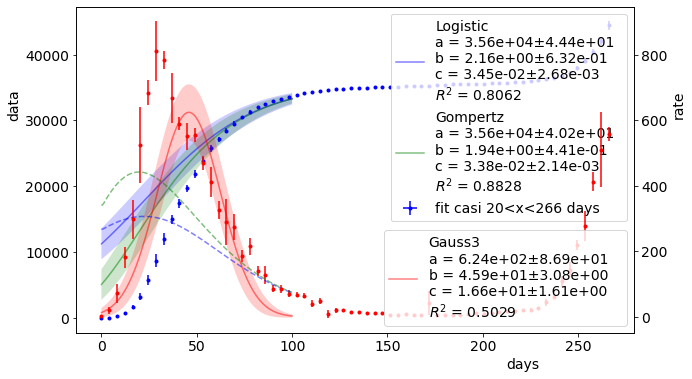

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

x = np.linspace(0, len(df['data']), len(df['data']))
y = df['totale_positivi']
y = df['deceduti']
MultiFitPlot(y, ax, 4, label='casi', stat=True, fmin=20)
ax.set_xlabel('days', x=0.8)
plt.show()

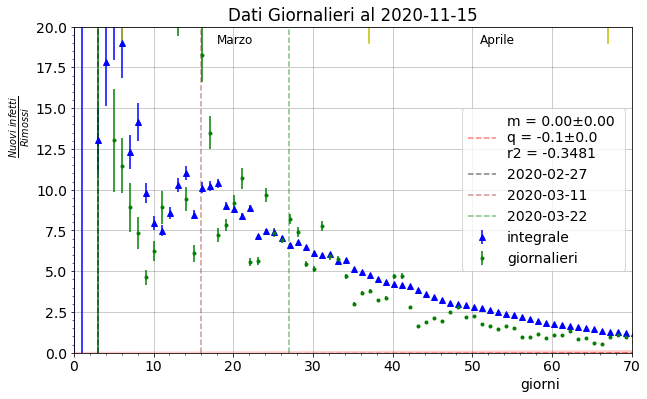

In [6]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, len(df['data']), len(df['data']))

a = df['totale_positivi']
b = df['dimessi_guariti']
y = a/b
err = y*np.sqrt((np.sqrt(a)/a)**2 + (np.sqrt(b)/b)**2)

ax.errorbar(x, y, yerr=err, fmt='b^', label='integrale')

day=16
mq,mqc = curve_fit(Line,x[x>day], y[x>day], p0=[-1,30], sigma=err[x>day])
mqe = np.sqrt(np.diag(mqc))
r2=r2_score(y[x>day] , Line(x[x>day], *mq))

a = df['nuovi_positivi'][x>3]
b = np.gradient(df['dimessi_guariti'][x>3],x[x>3])
y = a/b
err = y*np.sqrt((np.sqrt(a)/a)**2 + (np.sqrt(b)/b)**2)

ax.errorbar(x[x>3], y, yerr=err, fmt='g.', label='giornalieri')

x = np.linspace(0, 100, 100)
y = Line(x, *mq)
yp = y + 3*fitErr2(Line, x, mq, mqe)
yl = y - 3*fitErr2(Line, x, mq, mqe)
ax.plot(x, y, 'r--', alpha=0.5, label='m = {0:.2f}±{1:.2f} \nq = {2:.1f}±{3:.1f} \nr2 = {4:.4f}'.format(mq[0], mqe[0], mq[1], mqe[1], r2) )
ax.fill_between(x, yl, yp, facecolor='red', alpha=0.2)


day=3
ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day =16
ax.axvline(day, color='brown', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day =27
ax.axvline(day, color='green', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)

ax.set_title('Dati Giornalieri al '+str(np.array(df['data'])[-1])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel(r'$\frac{Nuovi\ infetti}{Rimossi}$', horizontalalignment = 'left', y=0.6)
# ax.text(50, 5, 'y = 0 il {:.0f}mo giorno'.format(-mq[1]/mq[0] ), fontsize=12)
# ax.axhline(1, color='red')
ax.legend(loc=0)
ymax = 20
yptxt = ymax - ymax*0.05
ax.set_ylim(0,ymax)
ax.set_xlim(0,100)
ax.plot([6,6], [yptxt,ymax], 'y-')
ax.plot([6+31,6+31], [yptxt,ymax], 'y-')
ax.plot([6+31+30,6+31+30], [yptxt,ymax], 'y-')
ax.plot([6+31+30+31,6+31+30+31], [yptxt,ymax], 'y-')
ax.text(6+12, yptxt, 'Marzo', fontsize=12)
ax.text(6+45, yptxt, 'Aprile', fontsize=12)
#ax.text(6+75, yptxt, 'Maggio', fontsize=12)
#ax.set_ylim(0,20)
ax.set_xlim(0,70)
#ax.set_yscale('log')
plt.grid(color='k', linestyle='-', linewidth=1, alpha=0.2)
plt.minorticks_on()
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in add


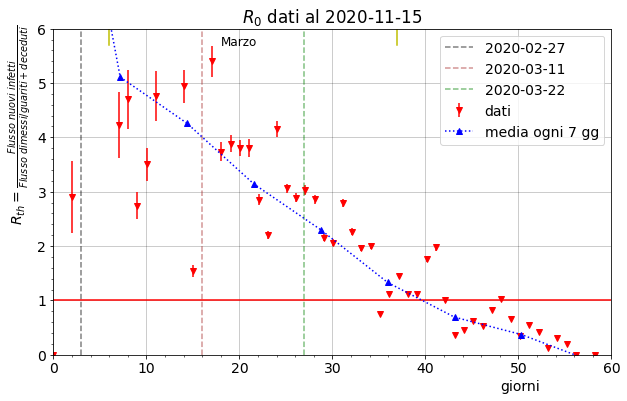

In [7]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, len(df['data']), len(df['data']))

a = df['variazione_totale_positivi']
b = np.gradient(df['dimessi_guariti'])+np.gradient(df['deceduti'])
Rth = a/b
err = Rth*np.sqrt((np.sqrt(a)/a)**2 + (np.sqrt(b)/b)**2)

ax.errorbar(x, Rth, yerr=err, fmt='rv', label='dati')

day=16
mq,mqc = curve_fit(Line,x[x>day], Rth[x>day], p0=[-1,30], sigma=err[x>day])
mqe = np.sqrt(np.diag(mqc))
r2=r2_score(Rth[x>day] , Line(x[x>day], *mq))


# N=4
# y = np.convolve(Rth, np.ones((N,))/N, mode='valid')
# x = np.linspace(0, len(y), len(y))
# ax.errorbar(x, y, yerr=0, fmt='k.:', label='running avarege')


y, err = ManSdtSubArr(Rth, 7)
x = np.linspace(0, len(df['data']),len(y))
ax.errorbar(x, y, fmt='b^:', label='media ogni 7 gg')


x = np.linspace(0, 100, 100)
y = Line(x, *mq)
yp = y + 2*fitErr2(Line, x, mq, mqe)
yl = y - 2*fitErr2(Line, x, mq, mqe)
# ax.plot(x, y, 'r--', alpha=0.5, label='m = {0:.2f}±{1:.2f} \nq = {2:.1f}±{3:.1f} \nr2 = {4:.4f}'.format(mq[0], mqe[0], mq[1], mqe[1], r2) )
ax.fill_between(x, yl, yp, facecolor='grey', alpha=0.2)


day=3
ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day =16
ax.axvline(day, color='brown', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day =27
ax.axvline(day, color='green', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
ax.axhline(1, color='red')

ax.set_title('$R_0$ dati al '+str(np.array(df['data'])[-1])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel(r'$R_{th} = \frac{Flusso\ nuovi\ infetti}{Flusso\ dimessi/guariti +deceduti}$', horizontalalignment = 'left', y=0.4)
ax.legend(loc=0)
ymax = 6
yptxt = ymax - ymax*0.05
ax.set_ylim(0,ymax)
ax.plot([6,6], [yptxt,ymax], 'y-')
ax.plot([6+31,6+31], [yptxt,ymax], 'y-')
# ax.plot([6+31+30,6+31+30], [yptxt,ymax], 'y-')
# ax.plot([6+31+30+31,6+31+30+31], [yptxt,ymax], 'y-')
ax.text(6+12, yptxt, 'Marzo', fontsize=12)
# ax.text(6+45, yptxt, 'Aprile', fontsize=12)
# ax.text(6+75, yptxt, 'Maggio', fontsize=12)
ax.set_xlim(0,60)
# ax.set_yscale('log')
plt.grid(color='k', linestyle='-', linewidth=1, alpha=0.2)
plt.minorticks_on()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


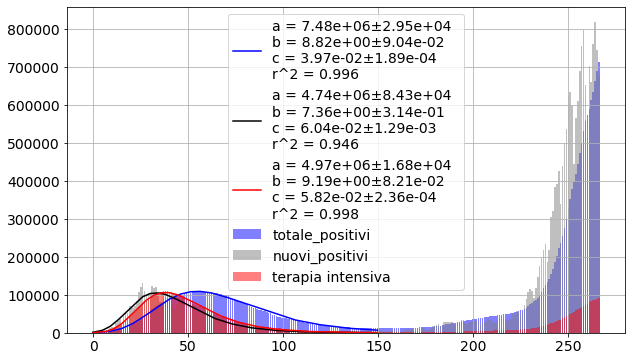

In [9]:
def fittalo(func, x, y, ax, fmt='k'):
  popt, pcov = curve_fit(func,x, y, p0=[4500.,20., 0.1])
  perr = np.sqrt(np.diag(pcov))
  r2=r2_score(y, func(x, *popt))
  ax.plot(x, func(x, *popt), fmt, label='a = {0:.2e}±{1:.2e}\nb = {2:.2e}±{3:.2e} \
  \nc = {4:.2e}±{5:.2e}\nr^2 = {6:.3f}'.format(popt[0], perr[0], popt[1], perr[1], popt[2], perr[2], r2))
  return ax
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, len(df['data']), len(df['data']))
y = df['totale_positivi']
ax.bar(x,y, color='blue', alpha=0.5, label='totale_positivi')
fittalo(dGompertz, x[x<150], y[x<150], ax, 'b')
y = df['nuovi_positivi']*20
ax.bar(x,y, color='grey', alpha=0.5, label='nuovi_positivi') 
fittalo(dGompertz, x[x<150], y[x<150], ax, 'k')
y = df['terapia_intensiva']*27
ax.bar(x,y, color='red', alpha=0.5, label='terapia intensiva')
fittalo(dGompertz, x[x<150], y[x<150], ax, 'r')
ax.legend()
ax.grid()
plt.show()

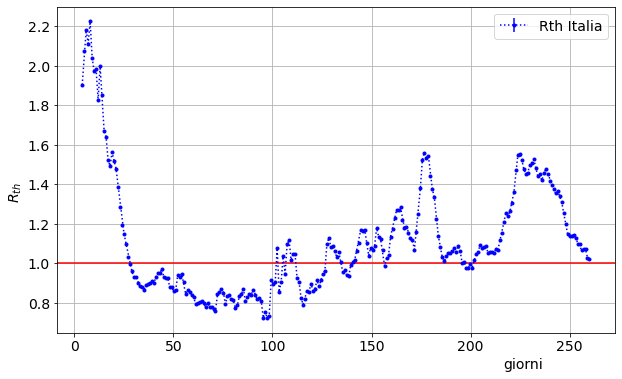

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, len(df['data']), len(df['data']))
data = df['nuovi_positivi']
N=7
y = np.convolve(data, np.ones((N,))/N, mode='valid')
x = np.linspace(0, len(y), len(y))
d=4
y_past = y[:-d]
x_ = x[d:]
Rth = y[d:]/y_past
# ax.errorbar(x, y, yerr=0, fmt='k.:', label='running avarege')
ax.errorbar(x_, Rth, yerr=0, fmt='b.:', label='Rth Italia')
ax.axhline(1, color='red')
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel(r'$R_{th}$', horizontalalignment = 'left', y=0.4)

ax.legend()
ax.grid()
plt.show()

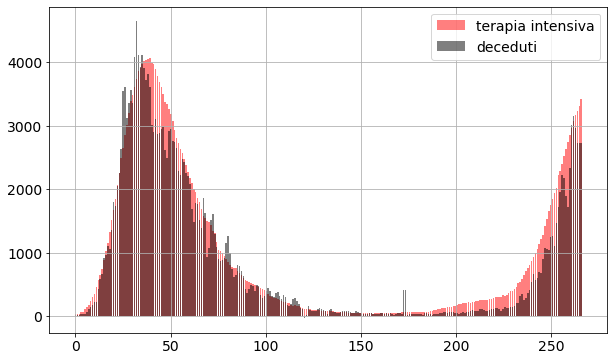

In [11]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, len(df['data']), len(df['data']))
ax.bar(x,df['terapia_intensiva'], color='red', alpha=0.5, label='terapia intensiva')
ax.bar(x,np.gradient(df['deceduti']*5), color='black', alpha=0.5, label='deceduti') 
ax.legend()
ax.grid()
plt.show()

a = 0.18 +/- 0.00
b = 26.63 +/- 2.32   
c = 26.03 +/- 1.70
$R^2$ = 0.7847


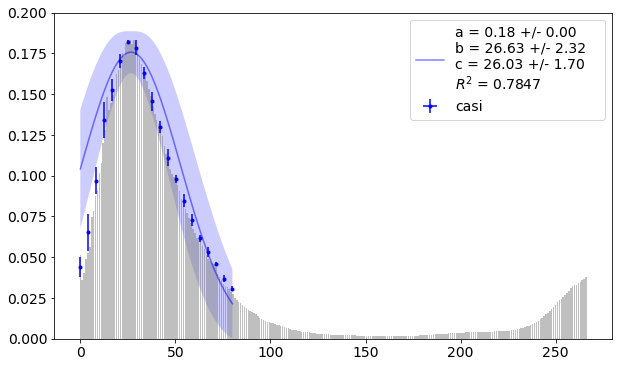

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, len(df['data']), len(df['data']))
a = df['totale_positivi']
b = df['tamponi']
y = a/b
err = y*np.sqrt((np.sqrt(a)/a)**2 + (np.sqrt(b)/b)**2)
ax.bar(x,y,color='gray', alpha=0.5)
GFPlot(y[x<80], ax, 4, 'b', label='casi', stat=True)

ax.set_ylim(0,0.2)
plt.legend()
plt.show()

a = 3720.57 +/- 671.47
b = 45.40 +/- 3.84   
c = 21.53 +/- 2.65
$R^2$ = 0.5409
a = 624.19 +/- 86.88
b = 45.89 +/- 3.08   
c = 16.61 +/- 1.61
$R^2$ = 0.5029


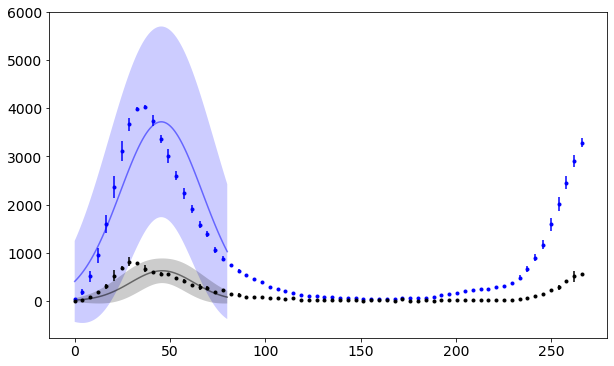

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, len(df['data']), len(df['data']))
y = df['terapia_intensiva']
GFPlot(y, ax, 4, 'b', label='casi', stat=True)
y = np.gradient(df['deceduti'])
GFPlot(y, ax, 4, 'k', label='casi', stat=True)

plt.show()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


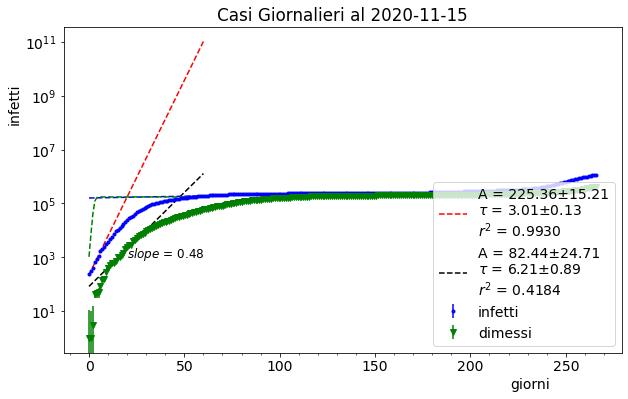

In [20]:

xd = x = np.linspace(0, len(df['data']), len(df['data']))
dfit = 0
min_exp_fit = 1+dfit
max_exp_fit = 7+dfit
y = df['totale_casi']
#y = df['deceduti']
yd = df['dimessi_guariti']
err = np.sqrt(np.gradient(y))
errd = np.sqrt(np.gradient(yd))
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(x, y, yerr=err, fmt='b.', label='infetti')
ax.errorbar(xd, yd, yerr=err, fmt='gv', label='dimessi')

xf = x[(min_exp_fit<x) & (x<max_exp_fit)]
yf = y[(min_exp_fit<x) & (x<max_exp_fit)]
ef = err[(min_exp_fit<x) & (x<max_exp_fit)]
depi = 9
xdf = xd[(min_exp_fit+depi<x) & (x<max_exp_fit+depi)]
ydf = yd[(min_exp_fit+depi<x) & (x<max_exp_fit+depi)]
edf = errd[(min_exp_fit+depi<x) & (x<max_exp_fit+depi)]

popt_e,pcov_e = curve_fit(Exp,xf, yf, p0=[300,3], sigma=ef)
popt_d,pcov_d = curve_fit(Exp,xdf, ydf, p0=[300,3], sigma=edf)
#popt_e,pcov_e = curve_fit(Infected,x[x<max_exp_fit], y[x<max_exp_fit], p0=[300.,1.,1.], sigma=err[x<max_exp_fit])
perr_e = np.sqrt(np.diag(pcov_e))
r2_e=r2_score(yf, Exp(xf, *popt_e))
perr_d = np.sqrt(np.diag(pcov_d))
r2_d=r2_score(yf, Exp(xdf, *popt_d))
#r2_e=r2_score(y[x<max_exp_fit], Infected(x[x<max_exp_fit], *popt_e))


popt_l,pcov_l = curve_fit(Logistic,x[x>16], y[x>16], p0=[130000.,1., 0.01], sigma=err[x>16]) # [130000.,.2, 30.]
perr_l = np.sqrt(np.diag(pcov_l))
r2_l=r2_score(y, Logistic(x, *popt_l))

popt_ld,pcov_ld = curve_fit(Logistic,xd[xd>16], yd[xd>16], p0=[3000.,1., 0.01], sigma=errd[xd>16])
perr_ld = np.sqrt(np.diag(pcov_ld))
r2_ld=r2_score(yd, Logistic(xd, *popt_ld))

x=np.linspace(0,60,60)
ax.plot(x, Exp(x, *popt_e), 'r--', label=('A = {0:.2f}±{1:.2f}\n'+r'$\tau$ = {2:.2f}±{3:.2f}'+\
'\n$r^2$ = {4:.4f}').format(popt_e[0], perr_e[0], popt_e[1], perr_e[1], r2_e))
ax.plot(x, Exp(x, *popt_d), 'k--', label=('A = {0:.2f}±{1:.2f}\n'+r'$\tau$ = {2:.2f}±{3:.2f}'+\
'\n$r^2$ = {4:.4f}').format(popt_d[0], perr_d[0], popt_d[1], perr_d[1], r2_d))
# ax.plot(x, Infected(x, *popt_e), 'r--', label='$I_0$ = {0:.2f}±{1:.2f}\n$\mu$ = {2:.2f}±{3:.2f} \
# \n$R_0$ = {4:.2f}±{5:.2f}\n$r^2$ = {6:.2f}'.format(popt_e[0], perr_e[0], popt_e[1], perr_e[1], popt_e[2], perr_e[2], r2_e))
ax.plot(x, Logistic(x, *popt_l), 'b--') #, label='L = {0:.0f} +/- {1:.0f}\nk = {2:.3f} +/- {3:.4f} \
# \nx0 = {4:.2f} +/- {5:.2f}\n$r^2$ = {6:.2f}'.format(popt_l[0], perr_l[0], popt_l[1], perr_l[1], popt_l[2], perr_l[2], r2_l))
ax.plot(x, Logistic(x, *popt_ld), 'g--') #, label='L = {0:.0f} +/- {1:.0f}\nk = {2:.3f} +/- {3:.4f} \
# \nx0 = {4:.2f} +/- {5:.2f}\n$r^2$ = {6:.2f}'.format(popt_ld[0], perr_ld[0], popt_ld[1], perr_ld[1], popt_ld[2], perr_ld[2], r2_ld))

ax.text(20, 1000, '$slope$ = {0:.2f}'.format(popt_e[1]/popt_d[1]), fontsize=12)

#ax.set_xlim(0,60)
#ax.set_ylim(1,1e6)
ax.set_title('Casi Giornalieri al '+str(np.array(df['data'])[-1])[0:10])
ax.legend(loc=4)
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('infetti', horizontalalignment = 'left', y=0.7)
ax.set_yscale('log')
plt.minorticks_on()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


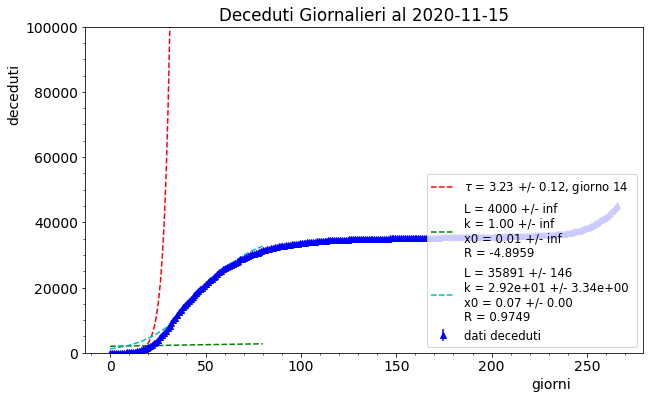

In [25]:

x = np.linspace(0, len(df['data']), len(df['data']))
# confronto con la Gompertz
max_exp_fit = 14
popt_e,pcov_e = curve_fit(Exp,x[x<max_exp_fit], df['deceduti'][x<max_exp_fit], p0=[1,2])
perr_e = np.sqrt(np.diag(pcov_e))
fig, ax = plt.subplots(figsize=(10,6))
err = np.sqrt(np.gradient(df['deceduti']))

ax.errorbar(x, df['deceduti'], yerr=err, fmt='b^', label='dati deceduti')

#ax.plot(x, df['deceduti'], 'b.', label='dati deceduti')
min_log_fit = 8
popt_l,pcov_l = curve_fit(Logistic,x[x>min_log_fit], df['deceduti'][x>min_log_fit], 
                          p0=[4000.,1., 0.01], sigma=err[x>min_log_fit])
perr_l = np.sqrt(np.diag(pcov_l))
popt_l_0,pcov_l_0 = curve_fit(Logistic,x[x>min_log_fit], df['deceduti'][x>min_log_fit], 
                          p0=[4000.,1., .01])
perr_l_0 = np.sqrt(np.diag(pcov_l_0))
r2_l=r2_score(df['deceduti'], Logistic(x, *popt_l))
r2_l_0=r2_score(df['deceduti'], Logistic(x, *popt_l_0))

x=np.linspace(0,80,80)
ax.plot(x, Exp(x, *popt_e), 'r--', label=r'$\tau$ = {0:.2f} +/- {1:.2f}, giorno {2:d}'.format(popt_e[1], perr_e[1], max_exp_fit))
ax.plot(x, Logistic(x, *popt_l), 'g--', label='L = {0:.0f} +/- {1:.0f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_l[0], perr_l[0], popt_l[1], perr_l[1], popt_l[2], perr_l[2], r2_l))

ax.plot(x, Logistic(x, *popt_l_0), 'c--', label='L = {0:.0f} +/- {1:.0f}\nk = {2:.2e} +/- {3:.2e} \
\nx0 = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_l_0[0], perr_l_0[0], popt_l_0[1], perr_l_0[1], popt_l_0[2], perr_l_0[2], r2_l_0))
#ax.set_yscale('log')
#ax.set_xlim(0,80)
ax.set_ylim(0,100000)
ax.legend(loc=4, prop={'size':'small'})
ax.set_title('Deceduti Giornalieri al '+str(np.array(df['data'])[-1])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('deceduti', horizontalalignment = 'left', y=0.7)
plt.minorticks_on()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


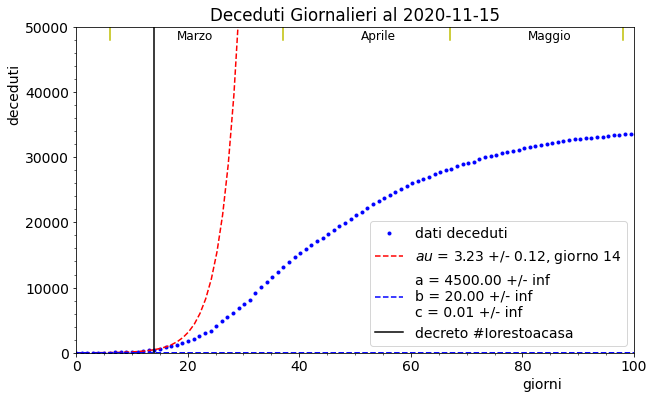

In [26]:
x = np.linspace(0, len(df['data']), len(df['data']))
# confronto con la Gompertz

max_exp_fit = 14
popt_e,pcov_e = curve_fit(Exp,x[x<max_exp_fit], df['deceduti'][x<max_exp_fit], p0=[1,2])
perr_e = np.sqrt(np.diag(pcov_e))
max_gom_fit = 16
err = np.sqrt(np.gradient(df['deceduti']))
popt_g,pcov_g = curve_fit(Gompertz,x[x>max_gom_fit], df['deceduti'][x>max_gom_fit], p0=[4500.,20., 0.01], sigma=err[x>max_gom_fit])
perr_g = np.sqrt(np.diag(pcov_g))

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, df['deceduti'], 'b.', label='dati deceduti')
x=np.linspace(0,100,100)
ax.plot(x, Exp(x, *popt_e), 'r--', label='$\tau$ = {0:.2f} +/- {1:.2f}, giorno {2:d}'.format(popt_e[1], perr_e[1], max_exp_fit))
ax.plot(x, Gompertz(x, *popt_g), 'b--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
\nc = {4:.2f} +/- {5:.2f}'.format(popt_g[0], perr_g[0], popt_g[1], perr_g[1], popt_g[2], perr_g[2]))


#ax.set_yscale('log')
ax.set_xlim(0,100)
ax.set_ylim(0,50000)
ax.plot([14,14], [0,50000], 'k-', label='decreto #Iorestoacasa')
ax.plot([6,6], [48000,50000], 'y-')
ax.plot([6+31,6+31], [48000,50000], 'y-')
ax.plot([6+31+30,6+31+30], [48000,50000], 'y-')
ax.plot([6+31+30+31,6+31+30+31], [48000,50000], 'y-')
ax.text(6+12, 48000, 'Marzo', fontsize=12)
ax.text(6+45, 48000, 'Aprile', fontsize=12)
ax.text(6+75, 48000, 'Maggio', fontsize=12)
ax.legend(loc=4)
ax.set_title('Deceduti Giornalieri al '+str(np.array(df['data'])[-1])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('deceduti', horizontalalignment = 'left', y=0.7)
plt.minorticks_on()
plt.show()


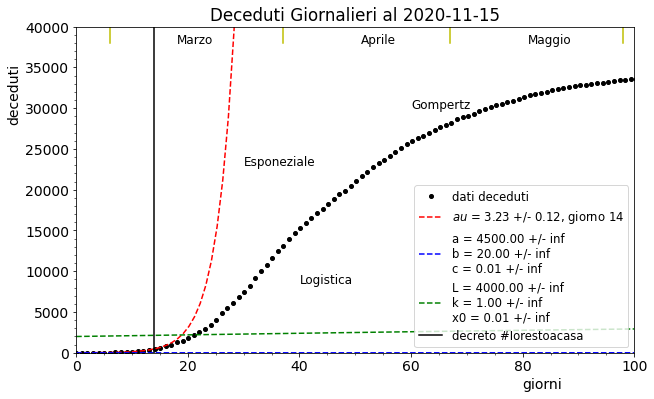

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, len(df['data']), len(df['data']))
ax.plot(x, df['deceduti'], 'k.', markersize=8, label='dati deceduti')
x=np.linspace(0,100,100)
ax.plot(x, Exp(x, *popt_e), 'r--', label='$\tau$ = {0:.2f} +/- {1:.2f}, giorno {2:d}'.format(popt_e[1], perr_e[1], max_exp_fit))
ax.plot(x, Gompertz(x, *popt_g), 'b--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
\nc = {4:.2f} +/- {5:.2f}'.format(popt_g[0], perr_g[0], popt_g[1], perr_g[1], popt_g[2], perr_g[2]))
ax.plot(x, Logistic(x, *popt_l), 'g--', label='L = {0:.2f} +/- {1:.2f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}'.format(popt_l[0], perr_l[0], popt_l[1], perr_l[1], popt_l[2], perr_l[2]))

#ax.set_yscale('log')
ymax = 40000
yptxt = ymax - ymax*0.05
ax.set_ylim(0,ymax)
ax.set_xlim(0,100)
ax.plot([14,14], [0,ymax], 'k-', label='decreto #Iorestoacasa')
ax.plot([6,6], [yptxt,ymax], 'y-')
ax.plot([6+31,6+31], [yptxt,ymax], 'y-')
ax.plot([6+31+30,6+31+30], [yptxt,ymax], 'y-')
ax.plot([6+31+30+31,6+31+30+31], [yptxt,ymax], 'y-')
ax.text(6+12, yptxt, 'Marzo', fontsize=12)
ax.text(6+45, yptxt, 'Aprile', fontsize=12)
ax.text(6+75, yptxt, 'Maggio', fontsize=12)

#ax.plot([6,6], [28000,30000], 'y-')
#ax.plot([6+31,6+31], [28000,30000], 'y-')
#ax.plot([6+31+30,6+31+30], [28000,30000], 'y-')
#ax.plot([6+31+30+31,6+31+30+31], [28000,30000], 'y-')
#ax.text(6+12, 28000, 'Marzo', fontsize=12)
##ax.text(6+45, 28000, 'Aprile', fontsize=12)
#ax.text(6+75, 28000, 'Maggio', fontsize=12)
ax.text(30, 23000, 'Esponeziale', fontsize=12)
ax.text(60, 30000, 'Gompertz', fontsize=12)
ax.text(40, 8500, 'Logistica', fontsize=12)
ax.legend(loc=4, prop={'size':'small'})
ax.set_title('Deceduti Giornalieri al '+str(np.array(df['data'])[-1])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('deceduti', horizontalalignment = 'left', y=0.7)
plt.minorticks_on()
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


L = 10000 +/- inf
k = 1.00 +/- inf 
x0 = 0.01 +/- inf
R = -3.1984
L = 227091182605 +/- 56288162590523584
k = 1422705.08 +/- 352640305335.10 
x0 = 0.00 +/- 0.00
R = 0.3750
a = 4500.00 +/- inf
b = 20.00 +/- inf 
c = 0.01 +/- inf
R = -18.2407
a = 275202.71 +/- 6770.88
b = 1.60 +/- 0.27 
c = 0.02 +/- 0.00
R = 0.1484


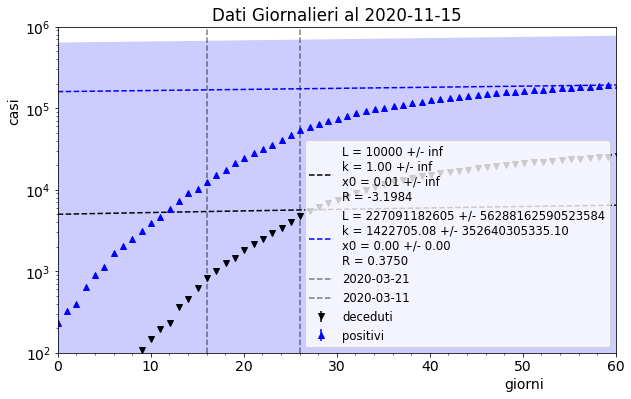

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


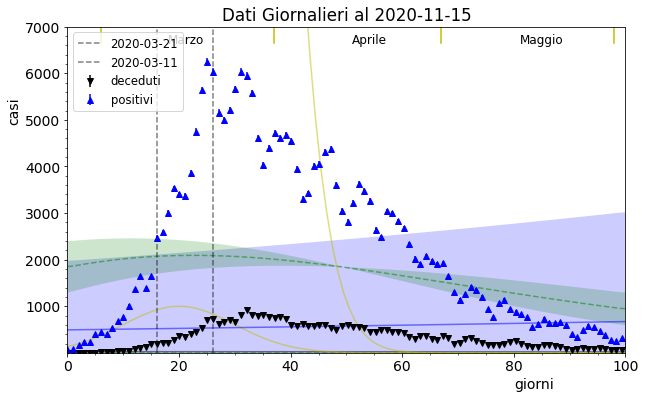

In [28]:
T_days =  len(df)
x = np.linspace(0, T_days, T_days)
fit_cut_l = 26
fit_cut_lc = 16


fig, ax = plt.subplots(figsize=(10,6))

y_int_IT = df['deceduti']
y2_int_IT = df['totale_casi']
y3_int_IT = df['terapia_intensiva']

err_IT = np.sqrt(np.gradient(y_int_IT,x))
err2_IT = np.sqrt(np.gradient(y2_int_IT,x))
err3_IT = np.sqrt(np.gradient(y3_int_IT,x))

ax.errorbar(x, y_int_IT, yerr=err_IT, fmt='kv', label='deceduti')
ax.errorbar(x, y2_int_IT, yerr=err2_IT, fmt='b^', label='positivi')
# ax.errorbar(x, y3_int_IT, yerr=err3_IT, fmt='r.', label='terapia intensiva')


popt_l_i,pcov_l_i = curve_fit(Logistic,x[x>fit_cut_l], y_int_IT[x>fit_cut_l], 
                              sigma=err_IT[x>fit_cut_l], p0=[10000.,1, 0.01])
perr_l_i = np.sqrt(np.diag(pcov_l_i))
r2_l_i=r2_score(y_int_IT, Logistic(x, *popt_l_i))

print('L = {0:.0f} +/- {1:.0f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_l_i[0], perr_l_i[0], popt_l_i[1], perr_l_i[1],
                                                popt_l_i[2], perr_l_i[2], r2_l_i))

popt_l_ic,pcov_l_ic = curve_fit(Logistic,x[x>fit_cut_lc], y2_int_IT[x>fit_cut_lc], 
                                sigma=err2_IT[x>fit_cut_lc], p0=[100000.,1, .01])
perr_l_ic = np.sqrt(np.diag(pcov_l_ic))
r2_l_ic=r2_score(y2_int_IT, Logistic(x, *popt_l_ic))
print('L = {0:.0f} +/- {1:.0f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_l_ic[0], perr_l_ic[0], popt_l_ic[1], perr_l_ic[1],
                                                popt_l_ic[2], perr_l_ic[2], r2_l_ic))
popt_g_i,pcov_g_i = curve_fit(Gauss3,x[x>fit_cut_l], np.gradient(y_int_IT[x>fit_cut_l], x[x>fit_cut_l]), 
                              sigma=err_IT[x>fit_cut_l], p0=[1000.,20, 10.])
perr_g_i = np.sqrt(np.diag(pcov_g_i))
popt_g_ic,pcov_g_ic = curve_fit(Gauss3,x[x>fit_cut_lc], np.gradient(y2_int_IT[x>fit_cut_lc], x[x>fit_cut_lc]), 
                              sigma=err_IT[x>fit_cut_lc], p0=[100000.,20, 10.])
perr_g_ic = np.sqrt(np.diag(pcov_g_ic))
# popt_l_it,pcov_l_it = curve_fit(Logistic,x[x>fit_cut_lc], y3_int_IT[x>fit_cut_lc], 
#                                 p0=[1000.,0.5, 20.], sigma=err3_IT[x>fit_cut_lc])
# perr_l_it = np.sqrt(np.diag(pcov_l_it))
#r2_g_i=r2_score(np.gradient(y_int_IT[x>fit_cut_l], x[x>fit_cut_l]), Logistic(x, *popt_l_i))
#r2_g_ic=r2_score(y_int_IT, Logistic(x, *popt_l_i))
# r2_l_it=r2_score(y3_int_IT , Logistic(x, *popt_l_it))
######################################
popt_geo_i,pcov_geo_i = curve_fit(Gompertz,x[x>fit_cut_l], y_int_IT[x>fit_cut_l], p0=[4500.,20., 0.01],
                                  sigma=err_IT[x>fit_cut_l])
perr_geo_i = np.sqrt(np.diag(pcov_geo_i))
r2_geo_i=r2_score(y_int_IT[x>fit_cut_l], Gompertz(x[x>fit_cut_l], *popt_geo_i))
print('a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
\nc = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_geo_i[0], perr_geo_i[0], popt_geo_i[1], perr_geo_i[1], 
                                               popt_geo_i[2], perr_geo_i[2], r2_geo_i))

popt_geo_ic,pcov_geo_ic = curve_fit(Gompertz,x[x>fit_cut_lc], y2_int_IT[x>fit_cut_lc], p0=[150000.,20., 0.01],
                                    sigma=err2_IT[x>fit_cut_lc])
perr_geo_ic = np.sqrt(np.diag(pcov_geo_ic))
r2_geo_ic=r2_score(y2_int_IT[x>fit_cut_lc], Gompertz(x[x>fit_cut_lc], *popt_geo_ic))
print('a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
\nc = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_geo_ic[0], perr_geo_ic[0], popt_geo_ic[1], perr_geo_ic[1], 
                                               popt_geo_ic[2], perr_geo_ic[2], r2_geo_ic))

#######################################

x = np.linspace(0, 100, 100)

# ax.plot(x, Gompertz(x, *popt_g_i), 'b--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
# \nc = {4:.2f} +/- {5:.2f}'.format(popt_g_i[0], perr_g_i[0], popt_g_i[1], perr_g_i[1], popt_g_i[2], perr_g_i[2]))

ax.plot(x, Logistic(x, *popt_l_i), 'k--', label='L = {0:.0f} +/- {1:.0f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_l_i[0], perr_l_i[0], popt_l_i[1], perr_l_i[1], 
                                                popt_l_i[2], perr_l_i[2], r2_l_i))
yp = Logistic(x, *popt_l_i) + 3*fitErr3(Logistic, x, popt_l_i, perr_l_i)
yl = Logistic(x, *popt_l_i) - 3*fitErr3(Logistic, x, popt_l_i, perr_l_i)
ax.fill_between(x, yl, yp, facecolor='black', alpha=0.2)

# ax.fill_between(x, 0, Logistic(x, *popt_l_i), facecolor='black', alpha=0.3)

ax.plot(x, Logistic(x, *popt_l_ic), 'b--', label='L = {0:.0f} +/- {1:.0f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_l_ic[0], perr_l_ic[0], popt_l_ic[1], perr_l_ic[1],
                                                popt_l_ic[2], perr_l_ic[2], r2_l_ic))
yp = Logistic(x, *popt_l_ic) + 3*fitErr3(Logistic, x, popt_l_ic, perr_l_ic)
yl = Logistic(x, *popt_l_ic) - 3*fitErr3(Logistic, x, popt_l_ic, perr_l_ic)
ax.fill_between(x, yl, yp, facecolor='blue', alpha=0.2)
# ax.plot(x, Logistic(x, *popt_l_it), 'r--', label='L = {0:.0f} +/- {1:.0f}\nk = {2:.2f} +/- {3:.2f} \
# \nx0 = {4:.2f} +/- {5:.2f}\nR = {6:.4f}'.format(popt_l_it[0], perr_l_it[0], popt_l_it[1], perr_l_it[1],
#                                                 popt_l_it[2], perr_l_it[2], r2_l_it))
# ax.fill_between(x, 0, Logistic(x, *popt_l_it), facecolor='red', alpha=0.5)

ax.axvline(fit_cut_l, color='black', linestyle='--', label='{:s}'.format(df.iloc[fit_cut_l, 0][0:10]), alpha=0.5)
ax.axvline(fit_cut_lc, color='black', linestyle='--', label='{:s}'.format(df.iloc[fit_cut_lc, 0][0:10]), alpha=0.5)


ymax = 1e6
yptxt = ymax - ymax*0.05
ax.set_ylim(100,ymax)
ax.set_xlim(0,60)

ax.set_title('Dati Giornalieri al '+str(np.array(df['data'])[-1])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi', horizontalalignment = 'left', y=0.7)
ax.set_yscale('log')
plt.minorticks_on()
plt.legend(loc=4, prop={'size':'small'})
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, T_days, T_days)

ax.errorbar(x, np.gradient(y_int_IT,x), yerr=err_IT, fmt='kv', label='deceduti')

ax.errorbar(x, np.gradient(y2_int_IT,x), yerr=err2_IT, fmt='b^', label='positivi')

# ax.errorbar(x, np.gradient(y3_int_IT,x), yerr=err3_IT, fmt='r^', label='t. intesiva')




x = np.linspace(0, 100, 100)

#y = np.gradient(Logistic(x, *popt_l_i), x)
y = dLogistic(x, *popt_l_i)
yp = dLogistic(x, *popt_l_i) + dLogistic(x, *popt_l_i)*3*fitErr3(Logistic, x, popt_l_i, perr_l_i)
yl = dLogistic(x, *popt_l_i) - dLogistic(x, *popt_l_i)*3*fitErr3(Logistic, x, popt_l_i, perr_l_i)
ax.plot(x, y, 'k-', alpha=0.5)
y = np.gradient(Gompertz(x, *popt_geo_i), x)
yp = np.gradient(Gompertz(x, *popt_geo_i) + 3*fitErr3(Gompertz, x, popt_geo_i, perr_geo_i),x)
yl = np.gradient(Gompertz(x, *popt_geo_i) - 3*fitErr3(Gompertz, x, popt_geo_i, perr_geo_i),x)
ax.plot(x, y, 'g--', alpha=0.5)
ax.fill_between(x, yl, yp, facecolor='green', alpha=0.2)
y = Gauss3(x, *popt_g_i)
yp = Gauss3(x, *popt_g_i) + 3*fitErr3(Gauss3, x, popt_g_i, perr_g_i)
yl = Gauss3(x, *popt_g_i) - 3*fitErr3(Gauss3, x, popt_g_i, perr_g_i)
ax.plot(x, y, 'y-', alpha=0.5)
ax.fill_between(x, yl, yp, facecolor='yellow', alpha=0.2)

ax.plot(x, np.gradient(Logistic(x, *popt_l_ic), x), 'b-', alpha=0.5)

y = np.gradient(Logistic(x, *popt_l_ic), x)
yp = np.gradient(Logistic(x, *popt_l_ic) + 3*fitErr3(Logistic, x, popt_l_ic, perr_l_ic),x)
yl = np.gradient(Logistic(x, *popt_l_ic) - 3*fitErr3(Logistic, x, popt_l_ic, perr_l_ic),x)
ax.fill_between(x, yl, yp, facecolor='blue', alpha=0.2)
y = np.gradient(Gompertz(x, *popt_geo_ic), x)
yp = np.gradient(Gompertz(x, *popt_geo_ic) + 3*fitErr3(Gompertz, x, popt_geo_ic, perr_geo_ic),x)
yl = np.gradient(Gompertz(x, *popt_geo_ic) - 3*fitErr3(Gompertz, x, popt_geo_ic, perr_geo_ic),x)
ax.plot(x, y, 'g--', alpha=0.5)
ax.fill_between(x, yl, yp, facecolor='green', alpha=0.2)
y = Gauss3(x, *popt_g_ic)
yp = Gauss3(x, *popt_g_ic) + 3*fitErr3(Gauss3, x, popt_g_ic, perr_g_ic)
yl = Gauss3(x, *popt_g_ic) - 3*fitErr3(Gauss3, x, popt_g_ic, perr_g_ic)
ax.plot(x, y, 'y-', alpha=0.5)
ax.fill_between(x, yl, yp, facecolor='yellow', alpha=0.2)
###################
ymax = 7000
yptxt = ymax - ymax*0.05
ax.set_ylim(1,ymax)
ax.set_xlim(0,100)
ax.plot([6,6], [yptxt,ymax], 'y-')
ax.plot([6+31,6+31], [yptxt,ymax], 'y-')
ax.plot([6+31+30,6+31+30], [yptxt,ymax], 'y-')
ax.plot([6+31+30+31,6+31+30+31], [yptxt,ymax], 'y-')
ax.text(6+12, yptxt, 'Marzo', fontsize=12)
ax.text(6+45, yptxt, 'Aprile', fontsize=12)
ax.text(6+75, yptxt, 'Maggio', fontsize=12)
ax.axvline(fit_cut_l, color='black', linestyle='--', label='{:s}'.format(df.iloc[fit_cut_l, 0][0:10]), alpha=0.5)
ax.axvline(fit_cut_lc, color='black', linestyle='--', label='{:s}'.format(df.iloc[fit_cut_lc, 0][0:10]), alpha=0.5)

ax.set_title('Dati Giornalieri al '+str(np.array(df['data'])[-1])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)

ax.set_ylabel('casi', horizontalalignment = 'left', y=0.7)
#ax.set_yscale('log')
plt.minorticks_on()
plt.legend(loc=2, prop={'size':'small'})
plt.show()
save_popt_l_i=popt_l_i

a = 4256.22 +/- 295.49
b = 43.23 +/- 1.33   
c = 20.87 +/- 1.01
$R^2$ = 0.7361
a = 3432.78 +/- 299.74
b = 46.08 +/- 2.03   
c = 15.41 +/- 0.97
$R^2$ = 0.6027


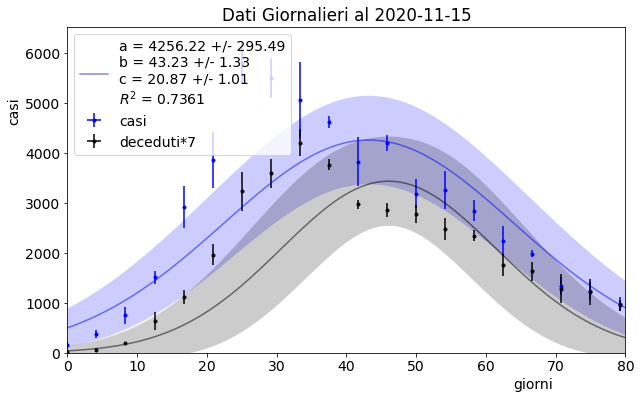

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
T_days =  len(df)
x = np.linspace(0, T_days, T_days)

# a = df['totale_positivi']
# b = df['tamponi']
# y = a/b
# err = y*np.sqrt((np.sqrt(a)/a)**2 + (np.sqrt(b)/b)**2)

GFPlot(np.gradient(df['totale_casi'])[x<100], ax, 4, 'b', label='casi', stat=True)
GFPlot(np.gradient(df['deceduti'])[x<100]*5, ax, 4, 'k', label='deceduti*7')
#GFPlot(df['totale_ospedalizzati']*0.18, ax, 4, 'y', label='ospedalizzati*0.18', stat=True)
plt.title('Dati Giornalieri al '+str(np.array(df['data'])[-1])[0:10])
plt.xlabel('giorni', horizontalalignment = 'left', x=0.8)
plt.ylabel('casi', horizontalalignment = 'left', y=0.7)
plt.xlim(0,80)
plt.ylim(bottom=0)
plt.legend()
plt.show()

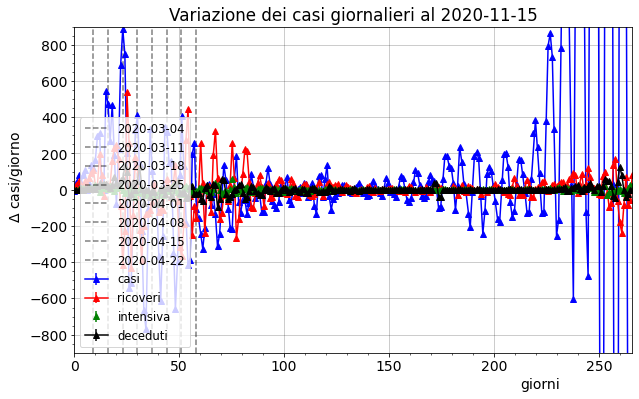

2020-03-09T18:00:00


In [31]:
# T_days =  len(df)
#from scipy.interpolate import spline
x = np.linspace(0, T_days, T_days)
fit_cut_l = 16
fit_cut_g = 0
fig, ax = plt.subplots(figsize=(10,6))

# popt_l,pcov_l = curve_fit(Logistic,x[x>fit_cut_l], df['totale_casi'][x>fit_cut_l], p0=[100000.,0.2, 25.], sigma=yerr[x>fit_cut_l])
# perr_l = np.sqrt(np.diag(pcov_l))
# ax.plot(x, np.gradient(Logistic(x, *popt_l),x), 'b--', label='L = {0:.2f} +/- {1:.2f}\nk = {2:.2f} +/- {3:.2f} \
# \nx0 = {4:.2f} +/- {5:.2f}'.format(popt_l[0], perr_l[0], popt_l[1], perr_l[1], popt_l[2], perr_l[2]))

y = np.gradient(np.gradient(df['totale_casi'],x), x)
yerr = 0
ax.errorbar(x, y, yerr=yerr, fmt='b^-', label='casi')
y = np.gradient(np.gradient(df['ricoverati_con_sintomi'],x),x)
yerr = 0
ax.errorbar(x, y, yerr=yerr, fmt='r^-', label='ricoveri')
y = np.gradient(np.gradient(df['terapia_intensiva'],x),x)
yerr = 0
ax.errorbar(x, y, yerr=yerr, fmt='g^', label='intensiva')
y = np.gradient(np.gradient(df['deceduti'],x),x)
yerr = 0
ax.errorbar(x, y, yerr=yerr, fmt='k^-', label='deceduti')

# ax.arrow(16,900, 0, 300)
# ax.plot([14,14], [-900,900], 'k--', label='9 marzo')
# ax.plot([21,21], [250,900], 'k--', label='+5 giorni')
# ax.plot([26,26], [150,900], 'k--', label='+10 giorni')
# ax.set_yscale('log')
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('$\Delta$ casi/giorno', horizontalalignment = 'left', y=0.4)
ax.set_title('Variazione dei casi giornalieri al '+str(np.array(df['data'])[-1][0:10]))
ax.set_ylim(-900,900)
ax.set_xlim(0,T_days)
day=9; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day=day+7; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day=day+7; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day=day+7; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day=day+7; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day=day+7; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day=day+7; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
day=day+7; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(df.iloc[day, 0][0:10]), alpha=0.5)
plt.minorticks_on()
plt.legend(loc=3, prop={'size':'small'})
plt.grid(color='k', linestyle='-', linewidth=1, alpha=0.2)
plt.show()
print (df.iloc[14,0])

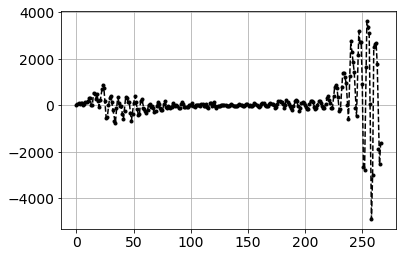

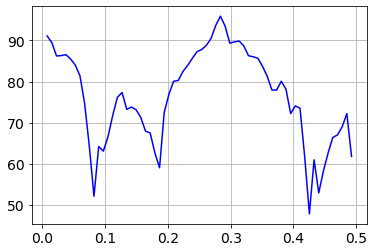

giorni max: 3.5263157894736845
giorni min: 2.350877192982456


In [32]:
# sample = 50
# x = np.linspace(0,sample, sample)
# y = np.sin(x)
x = np.linspace(0, T_days, T_days)
y = np.gradient(np.gradient(df['totale_casi'],x), x)
# y = np.gradient(np.gradient(df['terapia_intensiva'],x),x)
# y = np.gradient(np.gradient(df['deceduti'],x),x)
plt.plot(x, y, 'k.--')
plt.grid()
plt.show()
signalFFT = np.fft.rfft(y)
signalPSD = np.abs(signalFFT) ** 2
fftFreq = np.fft.fftfreq(len(signalPSD))
i = fftFreq>0
A = 10*np.log10(signalPSD[i])
plt.plot(fftFreq[i], A, 'b-')
plt.grid()
plt.show()
print('giorni max: '+str(1/fftFreq[i][np.argmax(A)]))
print('giorni min: '+str(1/fftFreq[i][np.argmin(A)]))

In [33]:
# world data
# https://github.com/CSSEGISandData/COVID-19
from datetime import datetime, timedelta
yesterday = datetime.now() - timedelta(days = 1)
data_sel = datetime.today().strftime('%Y-%m-%d')
#data_sel = '2020-04-07'

try:
  url_csv_file = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{:s}.xlsx".format(data_sel)
  dw = pd.read_excel(url_csv_file)
except:
  yesterday = datetime.now() - timedelta(days = 1)
  data_sel = yesterday.strftime('%Y-%m-%d')
  url_csv_file = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{:s}.xlsx".format(data_sel)
  dw = pd.read_excel(url_csv_file)
dw.tail()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
55717,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
55718,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
55719,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
55720,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
55721,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


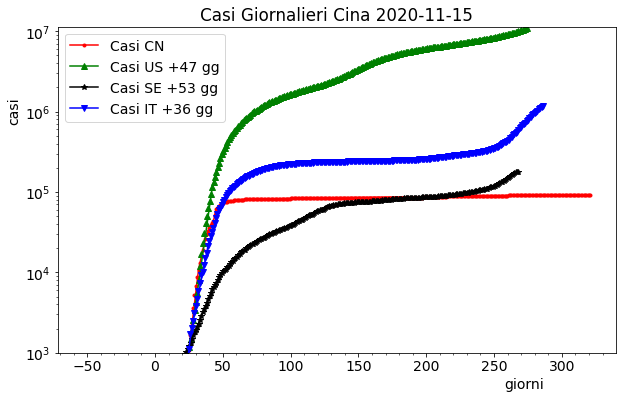

In [37]:
from scipy import integrate
from matplotlib.ticker import MaxNLocator
China = dw.loc[(dw['geoId'] == 'CN')].sort_values(by="dateRep")
Italy = dw.loc[(dw['geoId'] == 'IT')].sort_values(by="dateRep")
USA   = dw.loc[(dw['geoId'] == 'US')].sort_values(by="dateRep")
Spain = dw.loc[(dw['geoId'] == 'ES')].sort_values(by="dateRep")
Svezia = dw.loc[(dw['geoId'] == 'SE')].sort_values(by="dateRep")
T_days =  len(China)
ita_offset = 36
usa_offset = 47
spa_offset = 46
sve_offset = 53
x = np.linspace(0, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
y_int_IT = integrate.cumtrapz(Italy['cases'], x, initial=0)
y_int_US = integrate.cumtrapz(USA['cases'], x, initial=0)
#y_int_ES = integrate.cumtrapz(Spain['cases'], x, initial=0)
y_int_SE = integrate.cumtrapz(Svezia['cases'], x, initial=0)


y_int_CN = integrate.cumtrapz(China['cases'], x, initial=0)
ax.plot(x, y_int_CN, 'r.-', label='Casi CN')
ax.plot(x-usa_offset, y_int_US, 'g^-', label='Casi US +{:.0f} gg'.format(usa_offset))
#ax.plot(x-spa_offset, y_int_ES, 'y*-', label='Casi ES +{:.0f} gg'.format(spa_offset))
ax.plot(x-sve_offset, y_int_SE, 'k*-', label='Casi SE +{:.0f} gg'.format(sve_offset))
#ax.plot(x-ita_offset, y_int_IT, 'bv-', label='Casi IT')
x = np.linspace(56-ita_offset, len(df['data'])+56-ita_offset, len(df['data']))
ax.plot(x, df['totale_casi'], 'bv-', label='Casi IT +{:.0f} gg'.format(ita_offset))
ymax = 1000000
yptxt = ymax - ymax*0.05
ax.set_ylim(bottom=1000)
#ax.set_xlim(20,80)
ax.set_title('Casi Giornalieri Cina '+data_sel)
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi', horizontalalignment = 'left', y=0.7)
ax.set_yscale('log')
day=ita_offset-16
#ax.axvline(day, label='{:s}'.format(Italy.iloc[day, 0].strftime("%y-%b-%Y")))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.minorticks_on()
plt.legend(loc=2, prop={'size':'medium'})
plt.show()

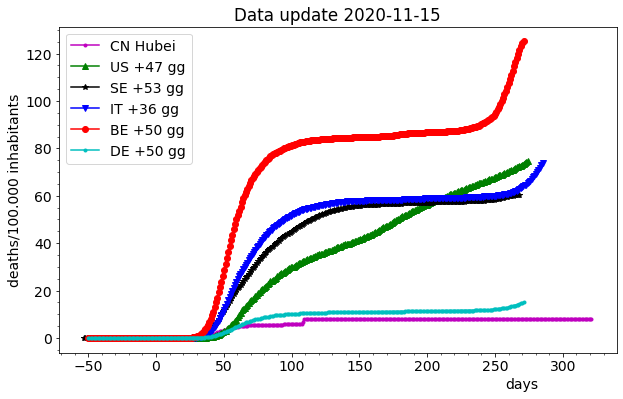

In [39]:
from scipy import integrate
from matplotlib.ticker import MaxNLocator
China = dw.loc[(dw['geoId'] == 'CN')].sort_values(by="dateRep")
Italy = dw.loc[(dw['geoId'] == 'IT')].sort_values(by="dateRep")
USA   = dw.loc[(dw['geoId'] == 'US')].sort_values(by="dateRep")
Spain = dw.loc[(dw['geoId'] == 'ES')].sort_values(by="dateRep")
Svezia = dw.loc[(dw['geoId'] == 'SE')].sort_values(by="dateRep")
Germania = dw.loc[(dw['geoId'] == 'DE')].sort_values(by="dateRep")
Belgio = dw.loc[(dw['geoId'] == 'BE')].sort_values(by="dateRep")
T_days =  len(China)
ita_offset = 36
usa_offset = 47
spa_offset = 46
sve_offset = 53
bel_offset = 50
ger_offset = 50
x = np.linspace(0, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
y_int_IT = integrate.cumtrapz(Italy['deaths'], x, initial=0)/603.6
y_int_US = integrate.cumtrapz(USA['deaths'], x, initial=0)/3282
#y_int_ES = integrate.cumtrapz(Spain['deaths'], x, initial=0)/469.4
y_int_SE = integrate.cumtrapz(Svezia['deaths'], x, initial=0)/102.3
y_int_CN = integrate.cumtrapz(China['deaths'], x, initial=0)/585 # 13930
y_int_BE = integrate.cumtrapz(Belgio['deaths'], x, initial=0)/114.6
y_int_DE = integrate.cumtrapz(Germania['deaths'], x, initial=0)/830.2

# y_int_IT = Italy['deaths']/603.6
# y_int_US = USA['deaths']/3282
# y_int_ES = Spain['deaths']/469.4
# y_int_SE = Svezia['deaths']/102.3
# y_int_CN = China['deaths']/585 # 13930
# y_int_BE = Belgio['deaths']/114.6
# y_int_DE = Germania['deaths']/830.2

ax.plot(x, y_int_CN, 'm.-', label='CN Hubei')
ax.plot(x-usa_offset, y_int_US, 'g^-', label='US +{:.0f} gg'.format(usa_offset))
#ax.plot(x-spa_offset, y_int_ES, 'y*-', label='ES +{:.0f} gg'.format(spa_offset))
ax.plot(x-sve_offset, y_int_SE, 'k*-', label='SE +{:.0f} gg'.format(sve_offset))
ax.plot(x-ita_offset, y_int_IT, 'bv-', label='IT +{:.0f} gg'.format(ita_offset))
ax.plot(x-bel_offset, y_int_BE, 'ro-', label='BE +{:.0f} gg'.format(bel_offset))
ax.plot(x-ger_offset, y_int_DE, 'c.-', label='DE +{:.0f} gg'.format(ger_offset))
ymax = 60
yptxt = ymax - ymax*0.05
#ax.set_ylim(0,ymax)
#ax.set_xlim(30,100)
ax.set_title('Data update '+data_sel[0:10])
ax.set_xlabel('days', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('deaths/100.000 inhabitants')
day=ita_offset-16
#ax.axvline(day, label='{:s}'.format(Italy.iloc[day, 0].strftime("%y-%b-%Y")))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.minorticks_on()
plt.legend(loc=2, prop={'size':'medium'})
plt.show()

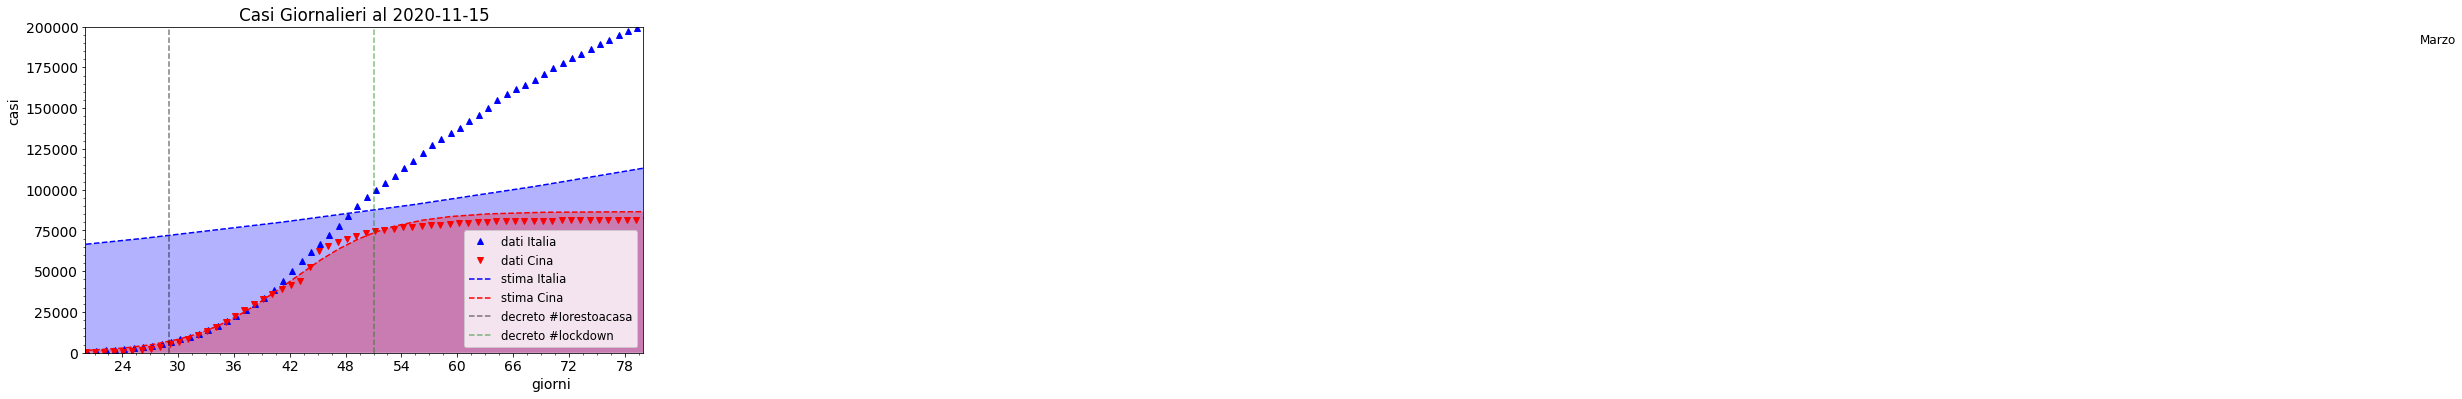

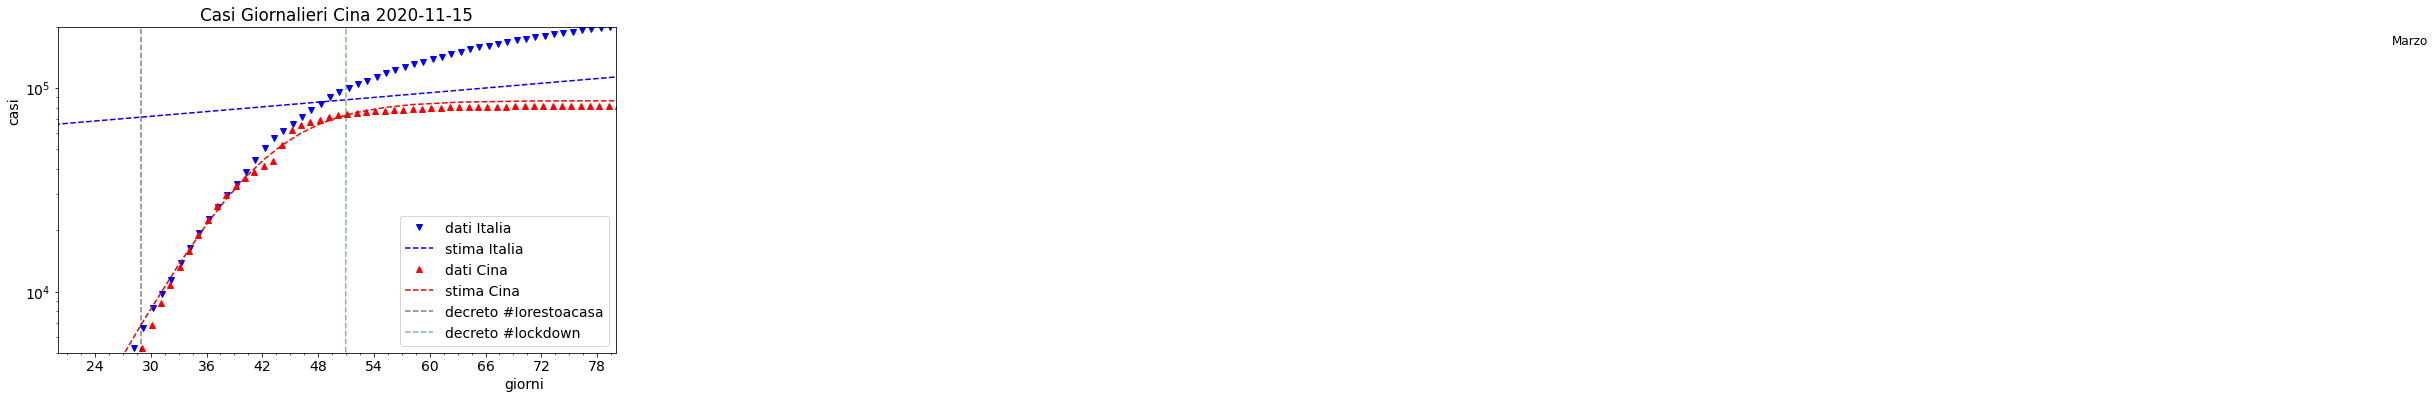

In [41]:
#China = dw.loc[(dw['GeoId'] == 'CN')].sort_values(by="DateRep")
#Italy = dw.loc[(dw['GeoId'] == 'IT')].sort_values(by="DateRep")
T_days =  len(China)
x = np.linspace(0, T_days, T_days)
ita_offset = 40
fit_cut = 40+30
fig, ax = plt.subplots(figsize=(10,6))

y_int_IT = integrate.cumtrapz(Italy['cases'], x, initial=0)
ax.plot(x-ita_offset, y_int_IT, 'b^', label='dati Italia')
y_int_CN = integrate.cumtrapz(China['cases'], x, initial=0)
ax.plot(x, y_int_CN, 'rv', label='dati Cina')

popt_l_c,pcov_l_c = curve_fit(Logistic,x, y_int_CN, p0=[80000.,10, 0.01])
perr_l_c = np.sqrt(np.diag(pcov_l_c))
popt_g_c,pcov_g_c = curve_fit(Gompertz,x, y_int_CN, p0=[80000.,200., 0.14])
perr_g_c = np.sqrt(np.diag(pcov_g_c))
popt_l_i,pcov_l_i = curve_fit(Logistic,(x-ita_offset)[x>fit_cut], y_int_IT[x>fit_cut], p0=[80000.,10, 0.01])
perr_l_i = np.sqrt(np.diag(pcov_l_i))
popt_g_i,pcov_g_i = curve_fit(Gompertz,(x-ita_offset)[x<100], y_int_IT[x<100], p0=[2000000.,15., 0.03])
perr_g_i = np.sqrt(np.diag(pcov_g_i))



x = np.linspace(-ita_offset, T_days, T_days+ita_offset)
# ax.plot(x, Gompertz(x, *popt_g_i), 'c--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
# \nc = {4:.2f} +/- {5:.2f}'.format(popt_g_i[0], perr_g_i[0], popt_g_i[1], perr_g_i[1], popt_g_i[2], perr_g_i[2]))
ax.plot(x, Logistic(x, *popt_l_i), 'b--', label='stima Italia' \
#        , label='L = {0:.2f} +/- {1:.2f}\nk = {2:.2f} +/- {3:.2f} \
#        \nx0 = {4:.2f} +/- {5:.2f}'.format(popt_l_i[0], perr_l_i[0], popt_l_i[1], perr_l_i[1], popt_l_i[2], perr_l_i[2])\
        )
ax.fill_between(x, 0, Logistic(x, *popt_l_i), facecolor='blue', alpha=0.3)

#x = np.linspace(0+57, len(df['data'])+57, len(df['data']))
#ax.plot(x, df['deceduti'], 'k.', markersize=8, label='dati deceduti')
# ax.plot(x, Gompertz(x, *popt_g_c), 'g--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
# \nc = {4:.2f} +/- {5:.2f}'.format(popt_g_c[0], perr_g_c[0], popt_g_c[1], perr_g_c[1], popt_g_c[2], perr_g_c[2]))
ax.plot(x, Logistic(x, *popt_l_c), 'r--', label='stima Cina' \
        # , label='L = {0:.2f} +/- {1:.2f}\nk = {2:.2f} +/- {3:.2f} \
        # \nx0 = {4:.2f} +/- {5:.2f}'.format(popt_l_c[0], perr_l_c[0], popt_l_c[1], perr_l_c[1], popt_l_c[2], perr_l_c[2])\
        )
ax.fill_between(x, 0,  Logistic(x, *popt_l_c), facecolor='red', alpha=0.3)

ymax = 200000
yptxt = ymax - ymax*0.05
ax.set_ylim(0,ymax)
#ax.set_ylim(5000,100000)

ax.set_xlim(20,80)
ax.set_title('Casi Giornalieri al '+data_sel)
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi', horizontalalignment = 'left', y=0.7)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot([29,29], [0,ymax], 'k--', label='decreto #Iorestoacasa', alpha=0.5)
ax.plot([29+22,29+22], [0,ymax], 'g--', label='decreto #lockdown', alpha=0.5)
ax.plot([T_days-ita_offset-21,T_days-ita_offset-21], [yptxt,ymax], 'y-')
ax.plot([T_days-ita_offset+10,T_days-ita_offset+10], [yptxt,ymax], 'y-')
ax.text(T_days-ita_offset-10, yptxt, 'Marzo', fontsize=12)

plt.minorticks_on()
plt.legend(loc=4, prop={'size':'small'})
#ax.set_yscale('log')
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, T_days, T_days)
y_int_IT = integrate.cumtrapz(Italy['cases'], x, initial=0)
ax.plot(x-ita_offset, y_int_IT, 'bv', label='dati Italia')
ax.plot(x, Logistic(x, *popt_l_i), 'b--', label='stima Italia')
y_int_CN = integrate.cumtrapz(China['cases'], x, initial=0)
ax.plot(x, y_int_CN, 'r^', label='dati Cina')
ax.plot(x, Logistic(x, *popt_l_c), 'r--', label='stima Cina')

#x = np.linspace(0+56-ita_offset, len(df['data'])+56-ita_offset, len(df['data']))
#ax.plot(x, df['totale_casi'], 'bv-', label='Casi IT')
ymax = 200000
yptxt = ymax - ymax*0.18
ax.set_ylim(5000,ymax)
ax.set_xlim(20,80)
ax.set_title('Casi Giornalieri Cina '+data_sel)
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi', horizontalalignment = 'left', y=0.7)

ax.set_yscale('log')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot([29,29], [0,ymax], 'k--', label='decreto #Iorestoacasa', alpha=0.5)
ax.plot([29+1,29+22], [0,ymax], 'g--', label='decreto #lockdown', alpha=0.5)
ax.plot([T_days-ita_offset-21,T_days-ita_offset-21], [yptxt,ymax], 'y-')
ax.plot([T_days-ita_offset+10,T_days-ita_offset+10], [yptxt,ymax], 'y-')
ax.text(T_days-ita_offset-10, yptxt, 'Marzo', fontsize=12)


plt.minorticks_on()

plt.legend(loc=4, prop={'size':'medium'})
plt.show()




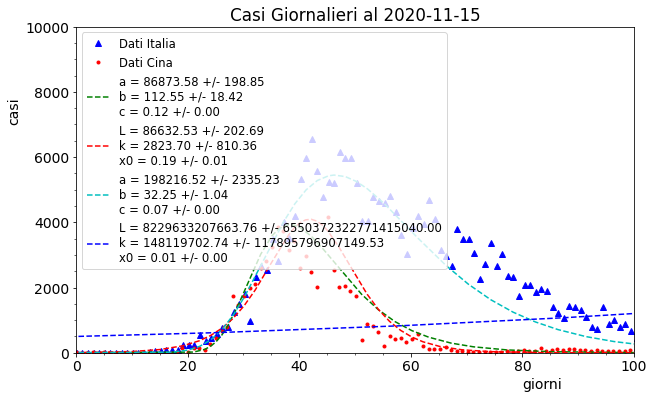

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, T_days, T_days)
ax.plot(x-ita_offset, Italy['cases'], 'b^', label='Dati Italia')
ax.plot(x,China['cases'], 'r.', label='Dati Cina')
ax.plot(x, np.gradient(Gompertz(x, *popt_g_c),x), 'g--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
\nc = {4:.2f} +/- {5:.2f}'.format(popt_g_c[0], perr_g_c[0], popt_g_c[1], perr_g_c[1], popt_g_c[2], perr_g_c[2]))
ax.plot(x, np.gradient(Logistic(x, *popt_l_c),x), 'r--', label='L = {0:.2f} +/- {1:.2f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}'.format(popt_l_c[0], perr_l_c[0], popt_l_c[1], perr_l_c[1], popt_l_c[2], perr_l_c[2]))
x = np.linspace(-ita_offset, T_days, T_days+ita_offset)
ax.plot(x, np.gradient(Gompertz(x, *popt_g_i),x), 'c--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
\nc = {4:.2f} +/- {5:.2f}'.format(popt_g_i[0], perr_g_i[0], popt_g_i[1], perr_g_i[1], popt_g_i[2], perr_g_i[2]))
ax.plot(x, np.gradient(Logistic(x, *popt_l_i), x), 'b--', label='L = {0:.2f} +/- {1:.2f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}'.format(popt_l_i[0], perr_l_i[0], popt_l_i[1], perr_l_i[1], popt_l_i[2], perr_l_i[2]))
ax.set_ylim(0,10000)
ax.set_xlim(0,100)

ax.set_title('Casi Giornalieri al '+data_sel)
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi', horizontalalignment = 'left', y=0.7)
plt.minorticks_on()
plt.legend(loc=2, prop={'size':'small'})
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply


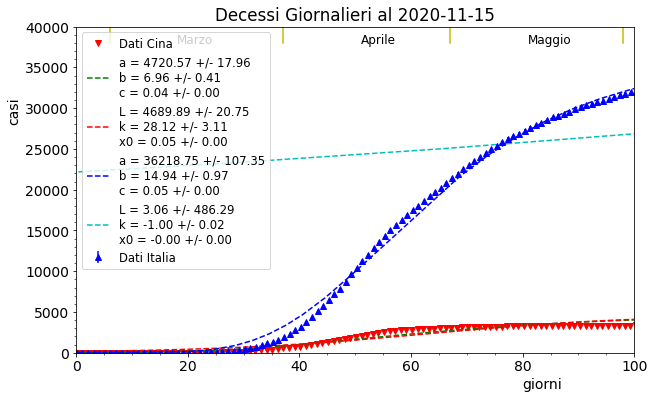

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in sqrt


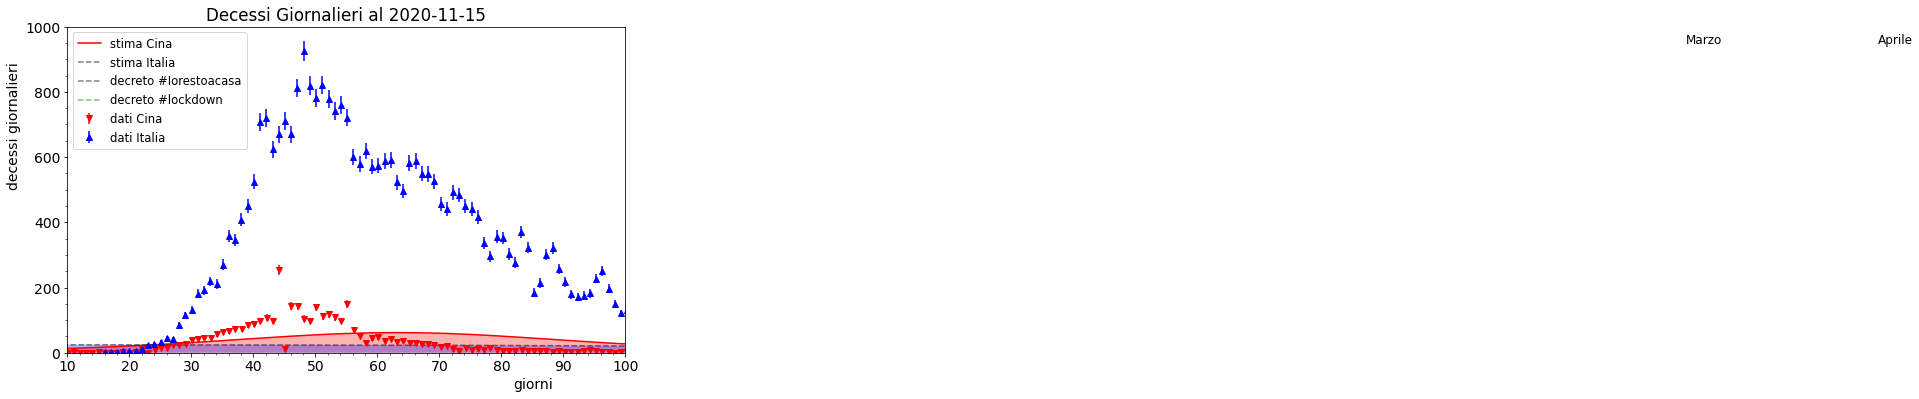

In [43]:
#China = dw.loc[(dw['GeoId'] == 'CN')].sort_values(by="DateRep")
#Italy = dw.loc[(dw['GeoId'] == 'IT')].sort_values(by="DateRep")
T_days =  len(China)
x = np.linspace(0, T_days, T_days)
ita_offset = 40
fit_cut_l = 40+36
fit_cut_g = 0
fig, ax = plt.subplots(figsize=(10,6))
y_int_IT = integrate.cumtrapz(Italy['deaths'], x, initial=0)
err_IT = np.sqrt(y_int_IT)
ax.errorbar(x-ita_offset, y_int_IT, yerr=err_IT, fmt='b^', label='Dati Italia')
y_int_CN = integrate.cumtrapz(China['deaths'], x, initial=0)
err_CN = np.sqrt(y_int_CN)
ax.plot(x, y_int_CN, 'rv', label='Dati Cina')


popt_l_c,pcov_l_c = curve_fit(Logistic,x, y_int_CN, p0=[80000.,10, 0.01])
perr_l_c = np.sqrt(np.diag(pcov_l_c))
popt_g_c,pcov_g_c = curve_fit(Gompertz,x, y_int_CN, p0=[80000.,200., 0.14])
perr_g_c = np.sqrt(np.diag(pcov_g_c))
popt_l_i,pcov_l_i = curve_fit(Logistic,(x-ita_offset)[x>fit_cut_l], y_int_IT[x>fit_cut_l], p0=[200000.,10, 0.01])
perr_l_i = np.sqrt(np.diag(pcov_l_i))
popt_g_i,pcov_g_i = curve_fit(Gompertz,(x-ita_offset), y_int_IT, p0=[400000.,20., 0.03])
perr_g_i = np.sqrt(np.diag(pcov_g_i))

x = np.linspace(0, 100, 100)
ax.plot(x, Gompertz(x, *popt_g_c), 'g--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
\nc = {4:.2f} +/- {5:.2f}'.format(popt_g_c[0], perr_g_c[0], popt_g_c[1], perr_g_c[1], popt_g_c[2], perr_g_c[2]))
ax.plot(x, Logistic(x, *popt_l_c), 'r--', label='L = {0:.2f} +/- {1:.2f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}'.format(popt_l_c[0], perr_l_c[0], popt_l_c[1], perr_l_c[1], popt_l_c[2], perr_l_c[2]))
x = np.linspace(-ita_offset, 100, 100+ita_offset)
ax.plot(x, Gompertz(x, *popt_g_i), 'b--', label='a = {0:.2f} +/- {1:.2f}\nb = {2:.2f} +/- {3:.2f} \
\nc = {4:.2f} +/- {5:.2f}'.format(popt_g_i[0], perr_g_i[0], popt_g_i[1], perr_g_i[1], popt_g_i[2], perr_g_i[2]))
ax.plot(x, Logistic(x, *popt_l_i), 'c--', label='L = {0:.2f} +/- {1:.2f}\nk = {2:.2f} +/- {3:.2f} \
\nx0 = {4:.2f} +/- {5:.2f}'.format(popt_l_i[0], perr_l_i[0], popt_l_i[1], perr_l_i[1], popt_l_i[2], perr_l_i[2]))

ymax = 40000
yptxt = ymax - ymax*0.05
ax.set_ylim(0,ymax)
ax.set_xlim(0,100)
#ax.plot([14,14], [0,ymax], 'k-', label='decreto #Iorestoacasa')
ax.plot([6,6], [yptxt,ymax], 'y-')
ax.plot([6+31,6+31], [yptxt,ymax], 'y-')
ax.plot([6+31+30,6+31+30], [yptxt,ymax], 'y-')
ax.plot([6+31+30+31,6+31+30+31], [yptxt,ymax], 'y-')
ax.text(6+12, yptxt, 'Marzo', fontsize=12)
ax.text(6+45, yptxt, 'Aprile', fontsize=12)
ax.text(6+75, yptxt, 'Maggio', fontsize=12)
ax.set_title('Decessi Giornalieri al '+str(Italy.iloc[-1,0])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi', horizontalalignment = 'left', y=0.7)
plt.minorticks_on()
plt.legend(loc=2, prop={'size':'small'})
plt.show()

fig, ax = plt.subplots(figsize=(10,6))
x = np.linspace(0, T_days, T_days)
err_IT = np.sqrt(Italy['deaths'])
err_CN = np.sqrt(China['deaths'])
ax.errorbar(x,China['deaths'], yerr=err_CN,  fmt='rv', label='dati Cina')
#ax.errorbar(x-ita_offset, Italy['deaths'], yerr=err_IT, fmt='b^', label='dati Italia')
xx = np.linspace(0+56-ita_offset, len(df['data'])+56-ita_offset, len(df['data']))
err_IT = np.sqrt(np.gradient(df['deceduti']))
ax.errorbar(xx, np.gradient(df['deceduti'], xx), yerr=err_IT, fmt='b^', label='dati Italia')


x = np.linspace(0, 100, 100)
# ax.plot(x, np.gradient(Gompertz(x, *popt_g_c),x), 'g--', label='Gompertz-CN +40 giorni')
ax.plot(x, np.gradient(Logistic(x, *popt_l_c),x), 'r-', label='stima Cina')
ax.fill_between(x, 0,np.gradient(Logistic(x, *popt_l_c),x), facecolor='red', alpha=0.3)
x = np.linspace(-ita_offset, 100, 100+ita_offset)
# ax.plot(x, np.gradient(Gompertz(x, *popt_g_i),x), 'b-', label='Gompertz-IT', alpha=0.5)
ax.plot(x, np.gradient(Logistic(x-16, *save_popt_l_i), x), 'k--', label='stima Italia', alpha=0.5)
ax.fill_between(x, 0, np.gradient(Logistic(x-16, *save_popt_l_i), x), facecolor='blue', alpha=0.3)



ymax = 1000
yptxt = ymax - ymax*0.05
ax.set_ylim(0,ymax)
ax.set_xlim(10,100)
#ax.plot([14,14], [0,ymax], 'k-', label='decreto #Iorestoacasa')
#ax.plot([31-ita_offset,31-ita_offset], [yptxt,ymax], 'y-')
# ax.plot([11+29-ita_offset,11+29-ita_offset], [yptxt,ymax], 'y-')
# ax.plot([11+29+31-ita_offset,11+29+31-ita_offset], [yptxt,ymax], 'y-')
# ax.plot([11+29+31+30-ita_offset,11+29+31+30-ita_offset], [yptxt,ymax], 'y-')
# ax.text(11+29-ita_offset+12, yptxt, 'Marzo', fontsize=12)
# ax.text(11+29+31-ita_offset+12, yptxt, 'Aprile', fontsize=12)
# ax.text(11+29+31+30-ita_offset+7, yptxt, 'Maggio', fontsize=12)
ax.plot([T_days-ita_offset-12,T_days-ita_offset-12], [0,ymax], 'k--', label='decreto #Iorestoacasa', alpha=0.5)
ax.plot([T_days-ita_offset,T_days-ita_offset], [0,ymax], 'g--', label='decreto #lockdown', alpha=0.5)
ax.plot([T_days-ita_offset-21,T_days-ita_offset-21], [yptxt,ymax], 'y-')
ax.plot([T_days-ita_offset+10,T_days-ita_offset+10], [yptxt,ymax], 'y-')
ax.text(T_days-ita_offset-10, yptxt, 'Marzo', fontsize=12)
ax.text(T_days-ita_offset-10+31, yptxt, 'Aprile', fontsize=12)

ax.set_title('Decessi Giornalieri al '+str(Italy.iloc[-1,0])[0:10])
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('decessi giornalieri', horizontalalignment = 'left', y=0.5)
plt.minorticks_on()
plt.legend(loc=2, prop={'size':'small'})
plt.show()

In [44]:
# DATI COVID REGIONI
# istat http://dati.istat.it/Index.aspx?QueryId=26428#
url_csv_file = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv"
dr = pd.read_csv(url_csv_file)
dr.tail()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note
5581,2020-11-15T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1476,217,1693,27114,28807,1001,1422,11829,896,25806.0,15726.0,41532,816609,565253.0,NaN
5582,2020-11-15T17:00:00,ITA,9,Toscana,43.769231,11.255889,1734,274,2008,50300,52308,1247,2653,25216,1879,63548.0,15855.0,79403,1331924,856660.0,NaN
5583,2020-11-15T17:00:00,ITA,10,Umbria,43.106758,12.388247,366,71,437,10658,11095,319,657,7528,253,5315.0,13561.0,18876,360719,203439.0,Si fa presente come nel computo dei ricoverati...
5584,2020-11-15T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,148,12,160,2135,2295,-4,143,2703,248,4641.0,605.0,5246,50230,29683.0,NaN
5585,2020-11-15T17:00:00,ITA,5,Veneto,45.434905,12.338452,1934,241,2175,59331,61506,1801,2792,36525,2845,27442.0,73434.0,100876,2562531,989643.0,Tamponi antigenici 588.190


In [45]:
# DATI Popolazione Regioni
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key=1qL5B_J6eV6bD9zicR0YsCIaUMU0BhTdSTrqC1UcDBI8&output=csv"
dpr = pd.read_csv(url_csv_file)
dpr

,Regione,Popolazione,Superficie,Densità,Comuni,Province,ti_esitenti,terapia_intensiva,densita_ti_perc,agenas
0,Lombardia,10060.574,23863.65,422,1506,12,900,1260,12.52,1301
1,Lazio,5879.082,17232.29,341,378,5,557,707,12.03,969
2,Campania,5801.692,13670.95,424,550,5,506,600,10.34,590
3,Sicilia,4999.891,25832.39,194,390,9,411,611,12.22,724
4,Veneto,4905.854,18345.35,267,563,7,494,825,16.82,1000
5,Emilia-Romagna,4459.477,22452.78,199,328,9,449,962,21.57,562
6,Piemonte,4356.406,25387.07,172,1181,8,320,420,9.64,577
7,Puglia,4029.053,19540.90,206,257,6,306,306,7.59,432
8,Toscana,3729.641,22987.04,162,273,10,447,650,17.43,515
9,Calabria,1947.131,15221.90,128,404,5,141,221,11.35,121


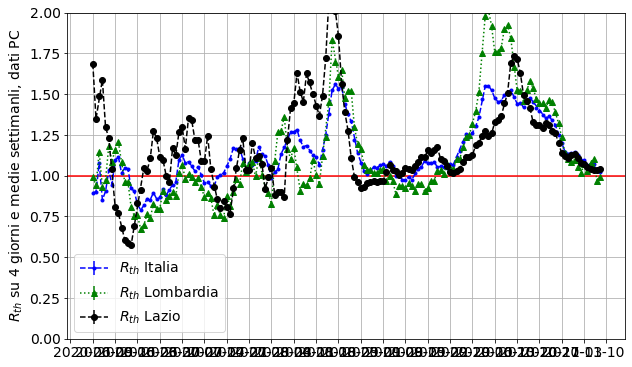

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
Lombardia = dr.loc[(dr['denominazione_regione'] == 'Lombardia')].sort_values(by="data").copy()
Lazio = dr.loc[(dr['denominazione_regione'] == 'Lazio')].sort_values(by="data").copy()

def Rth(data, N=7, d=4):
  # https://www.facebook.com/DatiAnalisiCoronavirus/posts/142436764043174?__tn__=K-R
  N=7
  y = np.convolve(data, np.ones((N,))/N, mode='valid')
  x = np.linspace(0, len(y), len(y))
  d=4 
  return x[d:] , y[d:]/y[:-d]


#fig.autofmt_xdate()
#x.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

data = df['nuovi_positivi']
xd , y = Rth(data)
cut = 100
x = np.array(df.iloc[cut+6:,0])
for i in range(len(x)):
  x[i]=x[i][0:10]
ax.errorbar(x , y[xd>cut], yerr=0, fmt='b.--', label='$R_{th}$ Italia')
data = Lombardia['nuovi_positivi']
xd , y = Rth(data)
ax.errorbar(x, y[xd>cut], yerr=0, fmt='g^:', label='$R_{th}$ Lombardia')
data = Lazio['nuovi_positivi']
xd , y = Rth(data)
ax.errorbar(x , y[xd>cut], yerr=0, fmt='ko--', label='$R_{th}$ Lazio')

ax.axhline(1, color='red')
#ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel(r'$R_{th}$ su 4 giorni e medie settimanli, dati PC')
ax.xaxis.set_major_locator(MultipleLocator(7))

ax.set_ylim(0,2)

ax.legend()
ax.grid()
plt.show()

In [52]:
#data_sel = '2020-04-03T17:00:00'
data_sel = dr.iloc[-1,0]
regioni = np.array(dpr['Regione'])
perc_tamponi = []
perc_positivi = []
perc_deceduti = []
for r in range(0, len(regioni)):
  if regioni[r]=='Trentino Alto Adige':
    popolazione = float(dpr.loc[dpr['Regione']=='Trentino Alto Adige']['Popolazione'].values[0])*1e3
    tamponi = 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Trento' ) & (dr['data'] == data_sel)]['tamponi'].values[0]
    tamponi = tamponi + 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Bolzano' ) & (dr['data'] == data_sel)]['tamponi'].values[0]
    perc_tamponi.append(tamponi/popolazione)
    positivi = 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Trento' ) & (dr['data'] == data_sel)]['totale_casi'].values[0]
    positivi = positivi + 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Bolzano' ) & (dr['data'] == data_sel)]['totale_casi'].values[0]
    perc_positivi.append(positivi/popolazione)
    deceduti = 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Trento' ) & (dr['data'] == data_sel)]['deceduti'].values[0]
    deceduti = deceduti + 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Bolzano' ) & (dr['data'] == data_sel)]['deceduti'].values[0]
    perc_deceduti.append(deceduti/popolazione)

  else:
    popolazione = float(dpr.loc[dpr['Regione']==regioni[r]]['Popolazione'].values[0])*1e3
    tamponi = 10000*dr.loc[(dr['denominazione_regione'] == regioni[r] ) & (dr['data'] == data_sel)]['tamponi'].values[0]
    perc_tamponi.append(tamponi/popolazione)
    positivi = 10000*dr.loc[(dr['denominazione_regione'] == regioni[r] ) & (dr['data'] == data_sel)]['totale_casi'].values[0]
    perc_positivi.append(positivi/popolazione)
    deceduti = 10000*dr.loc[(dr['denominazione_regione'] == regioni[r] ) & (dr['data'] == data_sel)]['deceduti'].values[0]
    perc_deceduti.append(deceduti/popolazione)


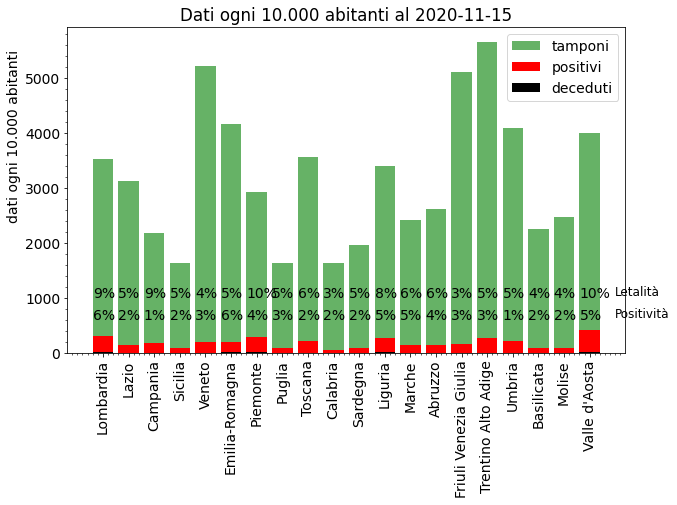

In [55]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(regioni, perc_tamponi, label='tamponi', alpha=0.6, color='green')
ax.bar(regioni, perc_positivi, label='positivi', color='red')
ax.bar(regioni, perc_deceduti, label='deceduti', color='black')

for i in range(regioni.size):
  if i % 2 == 0:
    offset = 4
  else:
    offset = 0
  plt.annotate('{:.0f}%'.format(100*perc_positivi[i]/perc_tamponi[i]), (i-0.4,1000+offset))
  plt.annotate('{:.0f}%'.format(100*perc_deceduti[i]/perc_positivi[i]), (i-0.4,600+offset))
#ax.set_yscale('log')
ax.text(20, 1050, 'Letalità', fontsize=12)
ax.text(20, 650, 'Positività', fontsize=12)
ax.set_title('Dati ogni 10.000 abitanti al '+str(dr.iloc[-1,0])[0:10])
ax.set_ylabel('dati ogni 10.000 abitanti', horizontalalignment = 'left', y=0.4)
plt.xticks(rotation=90)
plt.minorticks_on()
plt.legend()
plt.show()

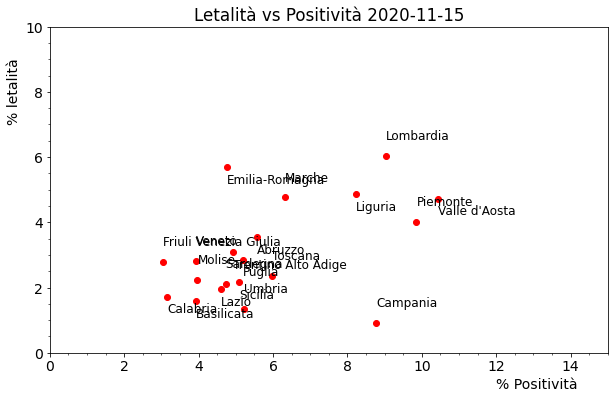

In [57]:
#col    = ('blue', 'red', 'black', 'green', 'cyan', 'magenta', 'yellow', 'darkblue', 'darkred', 'darkgrey', 'coral', 'khaki', 'teal',
#          'seagreen', 'navy', 'olive', 'tan', 'dimgrey', 'blueviolet', 'darkorange')
fig, ax = plt.subplots(figsize=(10,6))
x = 100*np.array(perc_positivi)/np.array(perc_tamponi)
y = 100*np.array(perc_deceduti)/np.array(perc_positivi)
#col    = ('b.-', 'r^-', 'cv-', 'mo-', 'yx-', 'k+-', 'g*-', 'b1-', 'r2-', 'c3-', 'm4-', 'yh-', 'kH-', 'gd-', 'b>-', 'r<-', 'cp-', 'md-', 'yD-', 'k|-', 'g,-')
ax.plot(x, y, 'ro')

for k in range(x.size):
    if k % 2 == 0:
      offset = 0.5
    else:
      offset = -0.5
    plt.annotate(regioni[k], (x[k],y[k]+offset),fontsize=12)
plt.minorticks_on()
ax.set_xlim(0,15)
ax.set_ylim(0,10)
ax.set_title('Letalità vs Positività '+str(np.array(df['data'])[-1])[0:10])
ax.set_xlabel('% Positività', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('% letalità', horizontalalignment = 'left', y=0.7)
plt.show()

In [58]:
Lombardia = dr.loc[(dr['denominazione_regione'] == 'Lombardia')].sort_values(by="data").copy()
Lazio = dr.loc[(dr['denominazione_regione'] == 'Lazio')].sort_values(by="data").copy()
dati_regioni = []
m = 3
for d in range(1,len(Lombardia)):
  day = d
  if d > 31:
    m = 4
    d = d-31
  data_sel = '2020-{0:02d}-{1:02d}T17:00:00'.format(m,d)
  print(data_sel)
  try:

    regioni = np.array(dpr['Regione'])
    perc_tamponi = []
    perc_positivi = []
    perc_deceduti = []
    for r in range(0, len(regioni)):
      if regioni[r]=='Trentino Alto Adige':
        popolazione = float(dpr.loc[dpr['Regione']=='Trentino Alto Adige']['Popolazione'].values[0])*1e3
        tamponi = 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Trento' ) & (dr['data'] == data_sel)]['tamponi'].values[0]
        tamponi = tamponi + 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Bolzano' ) & (dr['data'] == data_sel)]['tamponi'].values[0]
        perc_tamponi.append(tamponi/popolazione)
        positivi = 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Trento' ) & (dr['data'] == data_sel)]['totale_casi'].values[0]
        positivi = positivi + 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Bolzano' ) & (dr['data'] == data_sel)]['totale_casi'].values[0]
        perc_positivi.append(positivi/popolazione)
        deceduti = 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Trento' ) & (dr['data'] == data_sel)]['deceduti'].values[0]
        deceduti = deceduti + 10000*dr.loc[(dr['denominazione_regione'] == 'P.A. Bolzano' ) & (dr['data'] == data_sel)]['deceduti'].values[0]
        perc_deceduti.append(deceduti/popolazione)

      else:
        popolazione = float(dpr.loc[dpr['Regione']==regioni[r]]['Popolazione'].values[0])*1e3
        tamponi = 10000*dr.loc[(dr['denominazione_regione'] == regioni[r] ) & (dr['data'] == data_sel)]['tamponi'].values[0]
        perc_tamponi.append(tamponi/popolazione)
        positivi = 10000*dr.loc[(dr['denominazione_regione'] == regioni[r] ) & (dr['data'] == data_sel)]['totale_casi'].values[0]
        perc_positivi.append(positivi/popolazione)
        deceduti = 10000*dr.loc[(dr['denominazione_regione'] == regioni[r] ) & (dr['data'] == data_sel)]['deceduti'].values[0]
        perc_deceduti.append(deceduti/popolazione)
    dati_regioni.append([day, data_sel, np.array(perc_tamponi), np.array(perc_positivi), np.array(perc_deceduti)])
  except:
    print ('No Data') 
  

2020-03-01T17:00:00
2020-03-02T17:00:00
No Data
2020-03-03T17:00:00
No Data
2020-03-04T17:00:00
2020-03-05T17:00:00
2020-03-06T17:00:00
2020-03-07T17:00:00
No Data
2020-03-08T17:00:00
No Data
2020-03-09T17:00:00
No Data
2020-03-10T17:00:00
No Data
2020-03-11T17:00:00
2020-03-12T17:00:00
2020-03-13T17:00:00
2020-03-14T17:00:00
2020-03-15T17:00:00
2020-03-16T17:00:00
2020-03-17T17:00:00
2020-03-18T17:00:00
2020-03-19T17:00:00
2020-03-20T17:00:00
2020-03-21T17:00:00
2020-03-22T17:00:00
2020-03-23T17:00:00
2020-03-24T17:00:00
2020-03-25T17:00:00
2020-03-26T17:00:00
2020-03-27T17:00:00
2020-03-28T17:00:00
2020-03-29T17:00:00
2020-03-30T17:00:00
2020-03-31T17:00:00
2020-04-01T17:00:00
2020-04-02T17:00:00
2020-04-03T17:00:00
2020-04-04T17:00:00
2020-04-05T17:00:00
2020-04-06T17:00:00
2020-04-07T17:00:00
2020-04-08T17:00:00
2020-04-09T17:00:00
2020-04-10T17:00:00
2020-04-11T17:00:00
2020-04-12T17:00:00
2020-04-13T17:00:00
2020-04-14T17:00:00
2020-04-15T17:00:00
2020-04-16T17:00:00
2020-04-17T1

waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divisione per 0
waring divi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


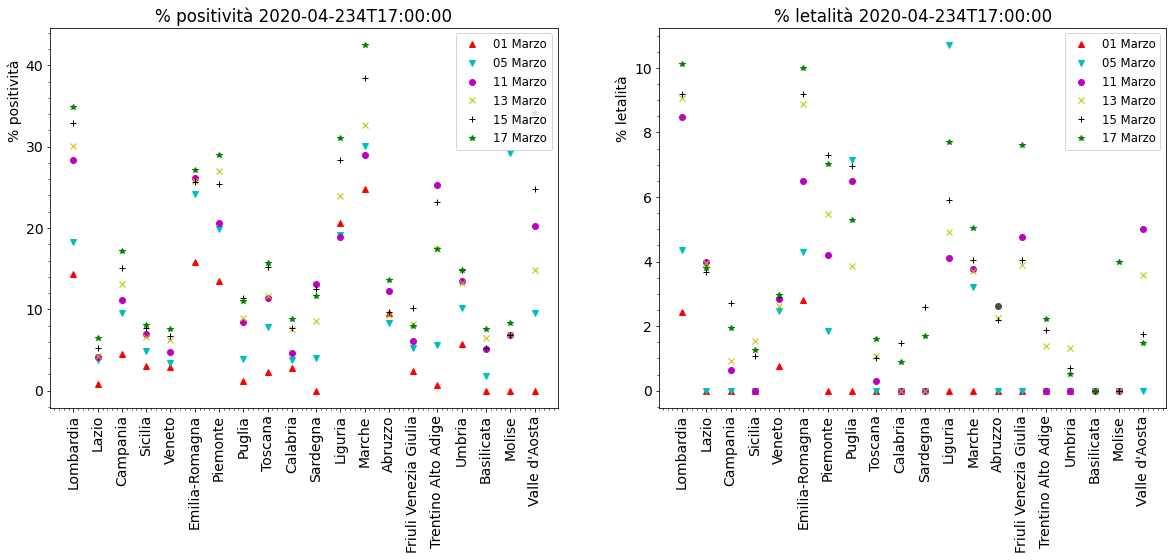

In [59]:
dati_regioni = np.array(dati_regioni)
col    = ('b.', 'r^', 'cv', 'mo', 'yx', 'k+', 'g*')
fig, ax = plt.subplots(1, 2, figsize=(20,7))
coli = 0
for d in range(0, len(dati_regioni), 2 ):
  coli +=1
  try:
    ax[0].plot(regioni, 100*dati_regioni[d][3]/dati_regioni[d][2], col[coli], label='{:02d} Marzo'.format(dati_regioni[d][0]))
  except:
    print ('waring divisione per 0')
  try:
    ax[1].plot(regioni, 100*dati_regioni[d][4]/dati_regioni[d][3], col[coli], label='{:02d} Marzo'.format(dati_regioni[d][0]))
  except:
    print ('waring divisione per 0')
ax[0].set_title('% positività '+data_sel)
ax[0].set_ylabel('% positività', horizontalalignment = 'left', y=0.7)
ax[1].set_title('% letalità '+data_sel)
ax[1].set_ylabel('% letalità', horizontalalignment = 'left', y=0.7)

ax[0].set_xticklabels(regioni, rotation=90)
ax[0].minorticks_on()
ax[0].legend(loc=1, prop={'size':'small'})
ax[1].set_xticklabels(regioni, rotation=90)
ax[1].minorticks_on()
ax[1].legend(loc=1, prop={'size':'small'})
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


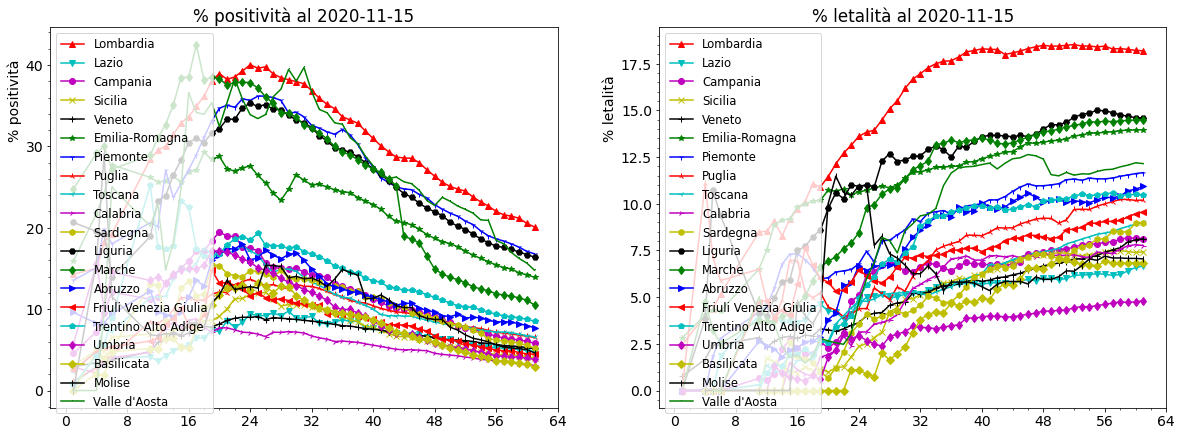

In [60]:
from matplotlib.ticker import MaxNLocator
col    = ('b.-', 'r^-', 'cv-', 'mo-', 'yx-', 'k+-', 'g*-', 'b1-', 'r2-', 'c3-', 'm4-', 'yh-', 'kH-', 'gd-', 'b>-', 'r<-', 'cp-', 'md-', 'yD-', 'k|-', 'g,-')
fig, ax = plt.subplots(1, 2, figsize=(20,7))

coli = 0
for r in range(0, len(regioni)):
  positivity = []
  letality = []
  coli +=1
  if coli >= len(col):
    coli = 0
  for d in range(0,len(dati_regioni)):
    positivity.append([100*dati_regioni[d][3][r]/dati_regioni[d][2][r]])
    letality.append(  [100*dati_regioni[d][4][r]/dati_regioni[d][3][r]])
    

  ax[0].plot(dati_regioni[:,0], positivity, col[coli], label='{:s}'.format(regioni[r]))
  ax[1].plot(dati_regioni[:,0], letality, col[coli], label='{:s}'.format(regioni[r]))
ax[0].set_title('% positività al '+str(dr.iloc[-1,0])[0:10])
ax[0].set_ylabel('% positività', horizontalalignment = 'left', y=0.7)
ax[1].set_title('% letalità al '+str(dr.iloc[-1,0])[0:10])
ax[1].set_ylabel('% letalità', horizontalalignment = 'left', y=0.7)

ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].minorticks_on()
ax[0].legend(loc=2, prop={'size':'small'})
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].minorticks_on()
ax[1].legend(loc=2, prop={'size':'small'})
plt.show()

/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:734: RuntimeWarning: divide by zero encountered in true_divide
  transform = 1.0 / sigma
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply
No handles with labels found to put in legend.
No handles with labels found to put in legend.


a = 1.87e+04±inf
b = 5.00e+00±inf   
c = 1.00e-02±inf
$R^2$ = -5.9338
a = 1.89e+04±8.73e+01
b = 4.97e-01±1.58e-01   
c = 1.88e-02±3.16e-03
$R^2$ = 0.4939


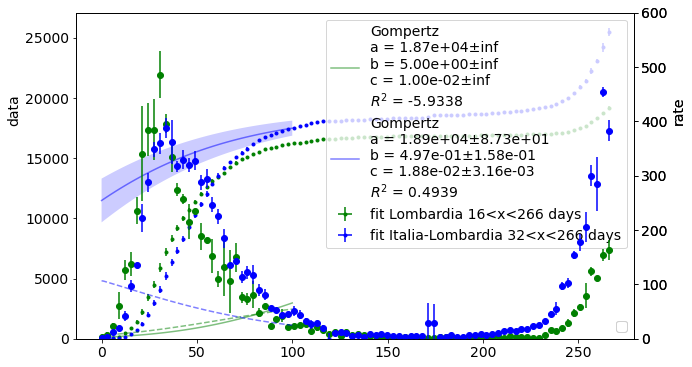

In [61]:
def MultiFitPlot2(arr, ax, mediasu=1, label='', stat=False, xmin=0, xmax=100, fmin=False, fmax=False, fmt='k'):

  y, err = ManSdtSubArr(arr, mediasu)
  x = np.linspace(0, len(arr), len(y))
  if not fmax:
    fmax = len(arr)
  ax.errorbar(x, y, xerr=0, yerr=err, fmt=fmt+'.', label='fit '+label+' {0:0d}<x<{1:0d} days'.format(fmin, fmax))
  y = np.array(y)[(x>fmin) & (x<fmax)]
  err = np.array(err)[(x>fmin) & (x<fmax)]
  x = np.array(x)[(x>fmin) & (x<fmax)]

  # funcL = Logistic
  # poptL, sigmaL, r2L = fit3ParFunc(funcL, x, y, err, p0=[max(y),np.mean(y), 0.01])
  # print(print3ParStat(poptL, sigmaL, r2L))
  # Plot3ParErrBand(ax, funcL, poptL, sigmaL, r2L, xmin, xmax, nsigma=1, fmt='b', stat=stat)

  funcG = Gompertz
  poptG, sigmaG, r2G = fit3ParFunc(funcG, x, y, err, p0=[max(y),5, 0.01])
  print(print3ParStat(poptG, sigmaG, r2G))
  Plot3ParErrBand(ax, funcG, poptG, sigmaG, r2G, xmin, xmax, nsigma=1, fmt=fmt, stat=stat)
  if stat:
    ax.legend(loc=1)
  ax.set_ylabel('data', y=0.7)
  ax = ax.twinx()

  y, err = ManSdtSubArr(np.gradient(arr), mediasu)
  x = np.linspace(0, len(arr), len(y))
  ax.errorbar(x, y, yerr=err, fmt=fmt+'o')
  # funcG3 = Gauss3
  # poptG3, sigmaG3, r2G3 = fit3ParFunc(funcG3, x, y, err, p0=[max(y),np.argmax(y)*mediasu, 10])
  # print (max(y),np.argmax(y), 10)
  # print(print3ParStat(poptG3, sigmaG3, r2G3))
  # Plot3ParErrBand(ax, funcG3, poptG3, sigmaG3, r2G3, xmin, xmax, nsigma=1, fmt='r', stat=stat)

  # difFitPlot(ax, funcL, poptL, xmin, xmax, fmt='b-')
  difFitPlot(ax, funcG, poptG, xmin, xmax, fmt=fmt+'-')
  ax.set_ylabel('rate', y=0.7)
  ax.set_ylim(0,600)
  if stat:
    ax.legend(loc=4)
  return 
T_days =  len(Lombardia)
x = np.linspace(0, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
y = Lombardia['deceduti']
MultiFitPlot2(y, ax, 3, label='Lombardia', stat=True, fmin=16, fmt='g')

y = np.array(df['deceduti'])-np.array(Lombardia['deceduti'])
MultiFitPlot2(y, ax, 3, label='Italia-Lombardia', stat=True, fmin=32, fmt='b')
ax.set_ylim(bottom=0)
plt.show()

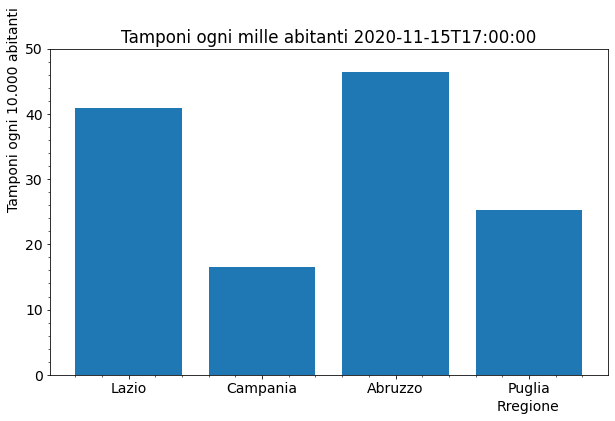

In [62]:
P_Lazio = 5.897e6
P_Campania = 5.827e6
P_Abruzzo = 1.315e6
P_Puglia = 4.048e6
y = [(10000*dr.loc[(dr['denominazione_regione'] == 'Lazio') & (dr['data'] == '2020-03-27T17:00:00')]['tamponi'].values/P_Lazio)[0],
     (10000*dr.loc[(dr['denominazione_regione'] == 'Campania') & (dr['data'] == '2020-03-27T17:00:00')]['tamponi'].values/P_Campania)[0],
     (10000*dr.loc[(dr['denominazione_regione'] == 'Abruzzo') & (dr['data'] == '2020-03-27T17:00:00')]['tamponi'].values/P_Abruzzo)[0],
     (10000*dr.loc[(dr['denominazione_regione'] == 'Puglia') & (dr['data'] == '2020-03-27T17:00:00')]['tamponi'].values/P_Puglia)[0]
     ]
fig, ax = plt.subplots(figsize=(10,6))
xl = ['Lazio', 'Campania', 'Abruzzo', 'Puglia']
x = [0,1,2,3]
#ax.plot(xl, y, linestyle='dashed')
ax.bar(xl, y)
#ax.set_xticks(x, xl)
ax.set_ylim(0, 50)
ax.set_title('Tamponi ogni mille abitanti '+str(np.array(df['data'])[-1]))
ax.set_xlabel('Rregione', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('Tamponi ogni 10.000 abitanti', horizontalalignment = 'left', y=0.5)
plt.minorticks_on()
plt.show()

In [63]:
# DATI Provincie
url_csv_file = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv"
dp = pd.read_csv(url_csv_file)
dp.head()



,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note
0,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN
1,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN
2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN
3,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN
4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN


In [64]:
Roma = dp.loc[(dp['denominazione_provincia'] == 'Roma')].sort_values(by="data").copy()
Milano = dp.loc[(dp['denominazione_provincia'] == 'Milano')].sort_values(by="data").copy()
Lombardia = dr.loc[(dr['denominazione_regione'] == 'Lombardia')].sort_values(by="data").copy()
Lazio = dr.loc[(dr['denominazione_regione'] == 'Lazio')].sort_values(by="data").copy()


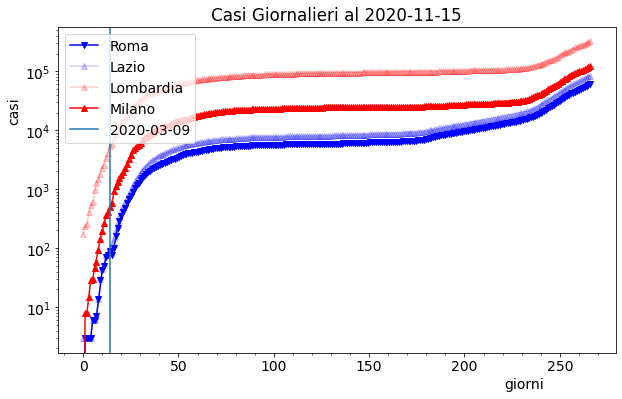

In [66]:
T_days =  len(Roma)
x = np.linspace(0, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, Roma['totale_casi'], 'bv-', label='Roma')
ax.plot(x, Lazio['totale_casi'], 'b^-', label='Lazio', alpha=0.2)
ax.plot(x, Lombardia['totale_casi'], 'r^-', label='Lombardia', alpha=0.2)
ax.plot(x, Milano['totale_casi'], 'r^-', label='Milano')

#ymax = 100000
#yptxt = ymax - ymax*0.05
#ax.set_ylim(5000,ymax)
#ax.set_ylim(100,100000)
#ax.set_xlim(20,60)
ax.set_title('Casi Giornalieri al '+str(Roma.iloc[-1, 0][0:10]))
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi', horizontalalignment = 'left', y=0.7)
day=14
ax.axvline(day, label='{:s}'.format(Roma.iloc[day, 0][0:10]))

ax.set_yscale('log')
plt.minorticks_on()
plt.legend(loc=2, prop={'size':'medium'})
plt.show()

a = 5.40e+08±1.14e+14
b = 1.26e+05±2.67e+10   
c = 2.62e-03±5.15e-03
$R^2$ = 0.0578
a = 6.35e+03±1.03e+02
b = 2.43e+00±7.05e-01   
c = 3.08e-02±4.31e-03
$R^2$ = -0.0773
2167.6666666666665 87 10
a = 8.57e+02±9.78e+02
b = 2.98e+02±5.49e+01   
c = 4.94e+01±1.30e+01
$R^2$ = 0.4927


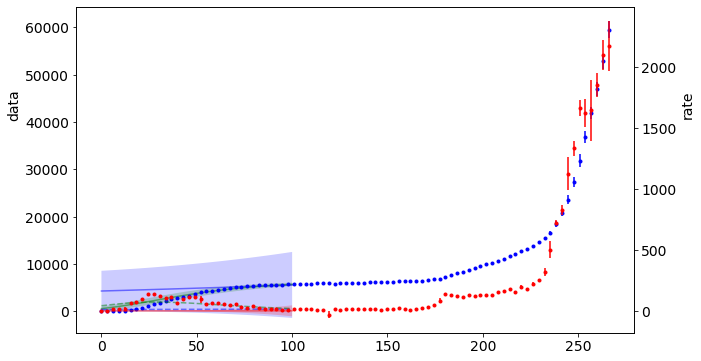

In [67]:
T_days =  len(Roma)
x = np.linspace(0, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
y = Roma['totale_casi']
MultiFitPlot(y, ax, 3, label='casi', stat=False, fmin=16)

plt.show()

In [68]:
# google mobility data
# https://www.google.com/covid19/mobility/
url_csv_file = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
dm = pd.read_csv(url_csv_file)
MItaly = dm.loc[(dm['country_region_code'] == 'IT')].sort_values(by="date")
#MItaly = MItaly.dropna(thresh=3)
MItaly.tail()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
1496994,IT,Italy,Marche,Province of Macerata,NaN,IT-MC,NaN,2020-11-10,-18.0,-2.0,44.0,-21.0,-17.0,10.0
1507251,IT,Italy,Tuscany,Province of Lucca,NaN,IT-LU,NaN,2020-11-10,-9.0,6.0,10.0,-20.0,-23.0,8.0
1481334,IT,Italy,Basilicata,NaN,NaN,IT-77,NaN,2020-11-10,-17.0,12.0,14.0,-44.0,-22.0,9.0
1509411,IT,Italy,Umbria,Province of Terni,NaN,IT-TR,NaN,2020-11-10,-20.0,4.0,4.0,-11.0,-28.0,9.0
1511571,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,2020-11-10,-22.0,-4.0,17.0,-43.0,-21.0,10.0


In [ ]:
T_days =  len(MItaly)
x = np.linspace(1, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
# retail_and_recreation_percent_change_from_baseline
# grocery_and_pharmacy_percent_change_from_baseline	
# parks_percent_change_from_baseline	
# transit_stations_percent_change_from_baseline	
# workplaces_percent_change_from_baseline	 
# residential_percent_change_from_baseline
what = 'residential_percent_change_from_baseline'
y = MItaly[what]
MLazio = MItaly.loc[MItaly['sub_region_1']=='Lazio'][what].copy()
T_days =  len(MLazio)
x = np.linspace(0, T_days, T_days)
plt.plot(x,MLazio,'b.-', label='Lazio')

MLombardia = MItaly.loc[MItaly['sub_region_1']=='Lombardy'][what]
T_days =  len(MLombardia)
x = np.linspace(0, T_days, T_days)
plt.plot(x,MLombardia,'g.--', label='Lombardia')
# day=8; ax.axvline(day, label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
# day=day+15; ax.axvline(day, label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
# day=day+12; ax.axvline(day, label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
#day=day-9;ax.axvline(day, label='{:s}'.format(Lazio.iloc[day, 0][0:10]))
plt.title(what)
plt.legend()
print(MItaly.iloc[0,4])
plt.show()

In [ ]:
MItaly.iloc[-1, 4]

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
T_days =  len(Lombardia)
t_offest =12
print (np.array(Lombardia['data'])[-t_offest])
x = np.linspace(1, T_days, T_days)
x = x + t_offest
#ax.plot(x, np.gradient(Lombardia['deceduti']), 'r--', label='Deceduti')
ax.bar(x, Lombardia['ricoverati_con_sintomi']/25, color='g', label='ric. con sintomi/25', alpha=0.5)

#ax.plot(x, Lombardia['terapia_intensiva']/3, 'b--', label='Intensiva/3')
ax.bar(x, Lombardia['terapia_intensiva']/3, color='b', label='Intensiva/3', alpha=0.5)
ax.bar(x, np.gradient(Lombardia['deceduti']), color='r', label='Deceduti')
plt.title(what+" vs deceduti - Lombardia")
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('numero di casi giornaliri')
#ax.axvline(T_days+9, label='{:s}'.format(Lombardia.iloc[-1, 0][0:10]))
ax.legend(loc=4)
ax = ax.twinx()
what = 'residential_percent_change_from_baseline'
MLombardia = MItaly[MItaly['sub_region_1']=='Lombardy']
T_days =  len(MLombardia)
x = np.linspace(1, T_days, T_days)
print (np.array(MLombardia['date'])[-1])
ax.plot(x, MLombardia[what], 'ko-', label='google data')
ax.set_ylabel('% di incremeto di persone a casa')
# day=8; ax.axvline(day, color='black', linestyle='--',label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
# day=day+15; ax.axvline(day, color='green', linestyle='--', label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
# day=day+12; ax.axvline(day, color='gray', linestyle='--', label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
#ax.axvline(T_days, label='{:s}'.format(MLombardia.iloc[-1, 4][0:10]))
ax.legend(loc=2)
ax.set_ylim(bottom=0)
plt.show()

In [ ]:
what = 'residential_percent_change_from_baseline'
y = MLombardia = MItaly[MItaly['sub_region_1']=='Lombardy']
T_days =  len(y)
x = np.linspace(1, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x, y[what], 'k.-', label='google data')
ax.set_ylabel('% di incremeto di persone a casa')
day=8; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
day=day+15; ax.axvline(day, color='green', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
day=day+12; ax.axvline(day, color='gray', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
ax.legend(loc=2)
ax = ax.twinx()
y = Lombardia
T_days =  len(y)
x = np.linspace(1, T_days, T_days)
x = x+t_offest
#plt.plot(x, np.gradient(y['totale_casi']), 'ro--', label='casi')
plt.bar(x, np.gradient(y['totale_casi']), color='r', label='casi')

plt.title(what+" vs casi - Lombardia")
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi')
ax.legend(loc=4)
plt.show()

In [ ]:
what = 'residential_percent_change_from_baseline'
y = MLombardia = MItaly[MItaly['sub_region_1']=='Lombardy']
T_days =  len(y)
x = np.linspace(1, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x, y[what], 'k.-', label='google data')
ax.set_ylabel('% di incremeto di persone a casa')
day=8; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
day=day+15; ax.axvline(day, color='green', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
day=day+12; ax.axvline(day, color='gray', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
#ax.set_ylim(0,60)
ax.legend(loc=0)
ax = ax.twinx()
y = Lombardia
T_days =  len(y)
x = np.linspace(1, T_days, T_days)
x = x+t_offest
ax.bar(x,Lombardia['nuovi_positivi'], color='grey', alpha=0.5, label='nuvi positivi')
#plt.plot(x, np.gradient(y['totale_casi']), 'r--', label='casi')
ax.set_ylim(bottom=0)
plt.title(what+" vs casi - Lombardia")
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi')
ax.legend(loc=4)
plt.show()


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
T_days =  len(Lazio)
x = np.linspace(1, T_days, T_days)
x = x+t_offest
print (np.array(Lazio['data'])[-t_offest])
#ax.plot(x, np.gradient(Lazio['deceduti']), 'r--', label='Deceduti')
ax.bar(x, Lazio['ricoverati_con_sintomi']/80, color='g', label='ric. con sintomi/35', alpha=0.5)

#ax.plot(x, Lazio['terapia_intensiva']/10, 'b--', label='Intensiva/3')
ax.bar(x, Lazio['terapia_intensiva']/15, color='b', label='Intensiva/4', alpha=0.5)
ax.bar(x, np.gradient(Lazio['deceduti']), color='r', label='Deceduti')
plt.title(what+" vs deceduti - Lazio")
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('numero di casi giornaliri')
#ax.axvline(T_days+9, label='{:s}'.format(Lazio.iloc[-1, 0][0:10]))
ax.legend(loc=4)
ax = ax.twinx()
what = 'residential_percent_change_from_baseline'
MLazio = MItaly[MItaly['sub_region_1']=='Lazio']
T_days =  len(MLazio)
print (np.array(MLazio['date'])[-1])
x = np.linspace(1, T_days, T_days)

ax.plot(x, MLazio[what], 'ko-', label='google data')
ax.set_ylabel('% di incremeto di persone a casa')
day=8; ax.axvline(day, color='black', linestyle='--',label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
day=day+15; ax.axvline(day, color='green', linestyle='--', label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
day=day+12; ax.axvline(day, color='gray', linestyle='--', label='{:s}'.format(MItaly[MItaly['sub_region_1']=='Lombardy'].iloc[day, 4]))
#ax.axvline(T_days, label='{:s}'.format(MLazio.iloc[-1, 4][0:10]))
ax.legend(loc=2)
ax.set_ylim(bottom=0)
plt.show()

In [ ]:
#Lombardia = dr.loc[(dr['denominazione_regione'] == 'Lombardia')].sort_values(by="data").copy()
#Lazio = dr.loc[(dr['denominazione_regione'] == 'Lazio')].sort_values(by="data").copy()
np.array(Lazio['data'])[10]

In [ ]:
what = 'residential_percent_change_from_baseline'
y = MLazio = MItaly[MItaly['sub_region_1']=='Lazio']
T_days =  len(y)
x = np.linspace(1, T_days, T_days)
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(x, y[what], 'k.-', label='google data')
ax.set_ylabel('% di incremeto di persone a casa')
day=8; ax.axvline(day, color='black', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
day=day+15; ax.axvline(day, color='green', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
day=day+12; ax.axvline(day, color='gray', linestyle='--', label='{:s}'.format(y.iloc[day, 4]))
#ax.set_ylim(0,60)
ax.legend(loc=0)
ax = ax.twinx()
y = Lazio
T_days =  len(y)
x = np.linspace(1, T_days, T_days)
x = x+t_offest
ax.bar(x,Lazio['nuovi_positivi'], color='grey', alpha=0.5, label='nuvi positivi')
#plt.plot(x, np.gradient(y['totale_casi']), 'r--', label='casi')
ax.set_ylim(bottom=0)
plt.title(what+" vs casi - Lazio")
ax.set_xlabel('giorni', horizontalalignment = 'left', x=0.8)
ax.set_ylabel('casi')
ax.legend(loc=4)
plt.show()